<a href="https://colab.research.google.com/github/abu-oxinus/Autoencoder_orders/blob/main/Autoencoder_orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation

# Extract

# Mount Google Drive in your Colab notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Files upload

In [ ]:
# upload kaggle API Token

from google.colab import files

files.upload()

In [4]:
import shutil

file_name = "/content/drive/MyDrive/Products.json"
destination_path = "/content/drive/MyDrive/json-data"

# Move the file
shutil.move(file_name, os.path.join(destination_path, os.path.basename(file_name)))

'/content/drive/MyDrive/json-data/Products.json'

In [11]:
import shutil


source_folder = "/content/json-data"
destination_path = "/content/drive/MyDrive/"

# Move the source_folder
shutil.move(source_folder, destination_path)

'/content/drive/MyDrive/json-data'

# Downloading order-data.zip

In [2]:
import os

# install kaggle
! pip install -q kaggle

! mkdir -p ~/.kaggle

! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d abuabkersuliman/order-data

 93% 133M/143M [00:01<00:00, 139MB/s]
100% 143M/143M [00:01<00:00, 123MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('order-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Create a dictionary of DataFrames: Iterate over files and read them into a dictionary of DataFrames

In [25]:
import pandas as pd
import os

# Directory where JSON files are located
json_dir = '/content/drive/MyDrive/json-data'

# Dictionary to hold your DataFrames
dataframes = {}

count = 0
for file_name in os.listdir(json_dir):
    count+=1
    if file_name.endswith('.json'):
        # Construct the full file path
        file_path = os.path.join(json_dir, file_name)
        # Normalize the file_name to create a valid Python variable name
        dataframe_name = 'df_' + file_name.replace('-', '_').rstrip('.json')
        # Read the JSON file into a DataFrame
        dataframes[dataframe_name] = pd.read_json(file_path)
        print(f'Loaded {file_name} into DataFrame with name {dataframe_name}. Shape: {dataframes[dataframe_name].shape}. df-num: {count}')

Loaded Products.json into DataFrame with name df_Product. Shape: (1356, 56). df-num: 1
Loaded 2017-08-01.json into DataFrame with name df_2017_08_01. Shape: (138328, 44). df-num: 2
Loaded 2018-01-01.json into DataFrame with name df_2018_01_01. Shape: (151294, 44). df-num: 3
Loaded 2018-03-01.json into DataFrame with name df_2018_03_01. Shape: (64290, 44). df-num: 4
Loaded 2018-06-01.json into DataFrame with name df_2018_06_01. Shape: (90089, 44). df-num: 5
Loaded 2018-10-01.json into DataFrame with name df_2018_10_01. Shape: (77744, 44). df-num: 6
Loaded 2019-01-01.json into DataFrame with name df_2019_01_01. Shape: (103859, 44). df-num: 7
Loaded 2019-03-01.json into DataFrame with name df_2019_03_01. Shape: (56779, 44). df-num: 8
Loaded 2019-07-01.json into DataFrame with name df_2019_07_01. Shape: (97174, 44). df-num: 9
Loaded 2019-12-01.json into DataFrame with name df_2019_12_01. Shape: (119672, 44). df-num: 10
Loaded 2020-03-01.json into DataFrame with name df_2020_03_01. Shape: (

# Access DataFrames using file names

In [26]:
df_Orders_316661 = dataframes['df_Orders_316661']

df_Orders_316661.shape

(289322, 55)

In [27]:
df_Orders_01 = df_Orders_316661.copy()

df_Orders_01.shape

(289322, 55)

In [28]:
df_Orders_01.columns

Index(['id', 'parent_id', 'odate', 'pos', 'uid', 'customer_id', 'table_id',
       'guests', 'residents', 'comments', 'status', 'cloud_status',
       'order_type_id', 'paid_date', 'color_id', 'shift_id', 'venue_id',
       'check_uid', 'order_tag', 'pricelist_id', 'address_id', 'room_id',
       'is_invoice', 'spotfolio_status', 'delivery_method', 'delivery_time',
       'assigned_date', 'order_no', 'min_order_value', 'tips',
       'tips_payment_type', 'round_amount', 'extra_charges', 'food_channel',
       'food_channel_id', 'food_channel_display_id', 'through_deliverect',
       'through_urbanpiper', 'food_channel_with_cash', 'fd_pickup_at',
       'fd_prepared_at', 'fd_ready_dispatch_at', 'fd_dispatched_at',
       'brand_id', 'cooking_date', 'delivery_date', 'timeframe',
       'subscription_id', 'friends_and_family', 'expo_informed', 'expo_closed',
       'sent_to_softone', 'card_last4_digits', 'created_at', 'updated_at'],
      dtype='object')

In [29]:
df_Orders_01.head()

,id,parent_id,odate,pos,uid,customer_id,table_id,guests,residents,comments,...,delivery_date,timeframe,subscription_id,friends_and_family,expo_informed,expo_closed,sent_to_softone,card_last4_digits,created_at,updated_at
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,NaN,2017-03-08 17:49:25,6,12,NaN,21,2,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 17:49:37,2017-03-08 20:03:25
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,NaN,2017-03-08 18:07:07,6,12,NaN,23,2,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 18:07:20,2017-03-09 00:54:56
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,NaN,2017-03-08 18:25:21,6,12,NaN,26,6,NaN,περιε,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 18:25:32,2017-03-08 21:09:54
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,NaN,2017-03-08 18:40:37,4,11,NaN,0,0,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 18:40:59,2017-03-08 19:23:24
4,4b79b04d-5f3a-422b-9f83-155572a2c816,NaN,2017-03-08 19:11:46,3,10,NaN,50,8,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 19:11:56,2017-03-08 22:39:41


In [10]:
df_Orders_01.to_csv('/content/drive/MyDrive/orders_01.csv', index=False)

# Installing Pyspark

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=75ad3f91b87e700c1741f9bcfbd218151ec4373df199dce348c1ff0731951ff8
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
import pyspark
from pyspark.sql import SparkSession

spark=SparkSession.builder.appName('Anomaly').getOrCreate()

In [4]:
spark

In [33]:
csv_dir = '/content/drive/MyDrive/orders_01.csv'

In [34]:
df_Orders_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)


In [35]:
df_Orders_spark.printSchema()

root
 |-- id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- odate: timestamp (nullable = true)
 |-- pos: integer (nullable = true)
 |-- uid: integer (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- table_id: integer (nullable = true)
 |-- guests: integer (nullable = true)
 |-- residents: double (nullable = true)
 |-- comments: string (nullable = true)
 |-- status: integer (nullable = true)
 |-- cloud_status: integer (nullable = true)
 |-- order_type_id: integer (nullable = true)
 |-- paid_date: timestamp (nullable = true)
 |-- color_id: integer (nullable = true)
 |-- shift_id: string (nullable = true)
 |-- venue_id: integer (nullable = true)
 |-- check_uid: integer (nullable = true)
 |-- order_tag: integer (nullable = true)
 |-- pricelist_id: integer (nullable = true)
 |-- address_id: string (nullable = true)
 |-- room_id: double (nullable = true)
 |-- is_invoice: integer (nullable = true)
 |-- spotfolio_status: double (nullable = true)
 |-- de

In [17]:
type(df_Orders_spark)

pyspark.sql.dataframe.DataFrame

In [18]:
df_Orders_spark.show(5)

+--------------------+---------+-------------------+---+---+-----------+--------+------+---------+--------+------+------------+-------------+-------------------+--------+--------------------+--------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+-------------+--------+---------------+----+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+------------+--------------+--------------------+----------------+--------+------------+-------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+-------------------+-------------------+
|                  id|parent_id|              odate|pos|uid|customer_id|table_id|guests|residents|comments|status|cloud_status|order_type_id|          paid_date|color_id|            shift_id|venue_id|check_uid|order_tag|pricelist_id|addres

In [19]:
df_Orders_spark.describe().show()

+-------+--------------------+---------+-----------------+------------------+-----------+------------------+------------------+---------+-------------------+-------------------+------------+-------------+-----------------+--------------------+--------------------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+--------+---------------+------+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+--------------+--------------------+----------------+--------+------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+
|summary|                  id|parent_id|              pos|               uid|customer_id|          table_id|            guests|residents|           comments|             status|cloud_status|order_type_id|         color_id|            shift_id|           

In [20]:
df_Orders_spark.count(), len(df_Orders_spark.columns)

(289322, 55)

In [ ]:
df_Orders_spark.dtypes

**SQL**

In [22]:
df_Orders_spark.createOrReplaceTempView("dfsql")

In [23]:
spark.sql("select * from dfsql").show()

+--------------------+---------+-------------------+---+---+-----------+--------+------+---------+--------------------+------+------------+-------------+-------------------+--------+--------------------+--------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+-------------+--------+---------------+----+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+------------+--------------+--------------------+----------------+--------+------------+-------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+-------------------+-------------------+
|                  id|parent_id|              odate|pos|uid|customer_id|table_id|guests|residents|            comments|status|cloud_status|order_type_id|          paid_date|color_id|            shift_id|venue_id|check_uid|order

In [42]:
spark.sql("select count(*) from dfsql where status = '2' ").show()

+--------+
|count(1)|
+--------+
|  284267|
+--------+



In [44]:
spark.sql("select * from dfsql where comments = 'περιε' ").show()

+--------------------+---------+-------------------+---+---+-----------+--------+------+---------+--------+------+------------+-------------+-------------------+--------+--------------------+--------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+-------------+--------+---------------+----+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+------------+--------------+--------------------+----------------+--------+------------+-------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+-------------------+-------------------+
|                  id|parent_id|              odate|pos|uid|customer_id|table_id|guests|residents|comments|status|cloud_status|order_type_id|          paid_date|color_id|            shift_id|venue_id|check_uid|order_tag|pricelist_id|addres

In [45]:
df_Orders_spark.groupBy('uid').count().show()

+---+-----+
|uid|count|
+---+-----+
| 31|   95|
| 34|  183|
| 26| 1026|
| 27| 5308|
| 12|11500|
| 22|25904|
|  3|  269|
| 20|10294|
| 19|21265|
| 37|  307|
|  9|22082|
| 17|39890|
| 35|23166|
|  8| 5031|
| 23| 1625|
| 10| 5393|
| 38|11437|
| 25|19714|
| 24|11674|
| 21| 1040|
+---+-----+
only showing top 20 rows



In [46]:
df_Orders_spark.write.csv('spark_orders')

In [49]:
df_Orders_spark = df_Orders_spark.coalesce(1)

In [50]:
df_Orders_spark.write.csv('spark_orders2')

In [103]:
from pyspark.sql.functions import isnull, when

In [73]:
df_Orders_spark.withColumn("missing_uid", when(isnull(df_Orders_spark["uid"]),1).otherwise(0)).show()

+--------------------+---------+-------------------+---+---+-----------+--------+------+---------+--------------------+------+------------+-------------+-------------------+--------+--------------------+--------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+-------------+--------+---------------+----+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+------------+--------------+--------------------+----------------+--------+------------+-------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+-------------------+-------------------+-----------+
|                  id|parent_id|              odate|pos|uid|customer_id|table_id|guests|residents|            comments|status|cloud_status|order_type_id|          paid_date|color_id|            shift_id|venue_id|che

In [112]:
from pyspark.sql.functions import year, month, dayofmonth, date_format

In [118]:
df_Orders_spark2 = df_Orders_spark.select("odate")

In [119]:
df_Orders_spark2.show()

+-------------------+
|              odate|
+-------------------+
|2017-03-08 17:49:25|
|2017-03-08 18:07:07|
|2017-03-08 18:25:21|
|2017-03-08 18:40:37|
|2017-03-08 19:11:46|
|2017-03-08 19:12:16|
|2017-03-08 19:15:23|
|2017-03-08 19:20:02|
|2017-03-08 19:27:17|
|2017-03-08 19:32:34|
|2017-03-08 19:33:27|
|2017-03-08 19:35:26|
|2017-03-08 19:37:38|
|2017-03-08 19:47:18|
|2017-03-08 19:48:16|
|2017-03-08 19:53:12|
|2017-03-08 20:05:21|
|2017-03-08 20:12:16|
|2017-03-08 20:17:56|
|2017-03-08 20:24:25|
+-------------------+
only showing top 20 rows



In [122]:
df_Orders_spark2.withColumn("year", year(df_Orders_spark2["odate"]))\
                .withColumn("month", month(df_Orders_spark2["odate"]))\
                .withColumn("day", dayofmonth(df_Orders_spark2["odate"]))\
                .withColumn("new_odate", date_format(df_Orders_spark2["odate"], "yyyy-MM-dd")).show()

+-------------------+----+-----+---+----------+
|              odate|year|month|day| new_odate|
+-------------------+----+-----+---+----------+
|2017-03-08 17:49:25|2017|    3|  8|2017-03-08|
|2017-03-08 18:07:07|2017|    3|  8|2017-03-08|
|2017-03-08 18:25:21|2017|    3|  8|2017-03-08|
|2017-03-08 18:40:37|2017|    3|  8|2017-03-08|
|2017-03-08 19:11:46|2017|    3|  8|2017-03-08|
|2017-03-08 19:12:16|2017|    3|  8|2017-03-08|
|2017-03-08 19:15:23|2017|    3|  8|2017-03-08|
|2017-03-08 19:20:02|2017|    3|  8|2017-03-08|
|2017-03-08 19:27:17|2017|    3|  8|2017-03-08|
|2017-03-08 19:32:34|2017|    3|  8|2017-03-08|
|2017-03-08 19:33:27|2017|    3|  8|2017-03-08|
|2017-03-08 19:35:26|2017|    3|  8|2017-03-08|
|2017-03-08 19:37:38|2017|    3|  8|2017-03-08|
|2017-03-08 19:47:18|2017|    3|  8|2017-03-08|
|2017-03-08 19:48:16|2017|    3|  8|2017-03-08|
|2017-03-08 19:53:12|2017|    3|  8|2017-03-08|
|2017-03-08 20:05:21|2017|    3|  8|2017-03-08|
|2017-03-08 20:12:16|2017|    3|  8|2017

# Spark

# 1- Checking for Complete Duplicates Across All Columns

In [22]:
from pyspark.sql.functions import col

# Count duplicates
duplicate_rows = df_Orders_spark.groupBy(df_Orders_spark.columns) \
                                .count() \
                                .where(col('count') > 1) \
                                .drop('count')

# Show duplicate rows
duplicate_rows.show()

+--------------------+---------+-------------------+---+---+-----------+--------+------+---------+--------+------+------------+-------------+-------------------+--------+--------------------+--------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+-------------------+--------+---------------+----+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+-------------------+--------------+--------------------+----------------+--------+------------+-------------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+-------------------+-------------------+
|                  id|parent_id|              odate|pos|uid|customer_id|table_id|guests|residents|comments|status|cloud_status|order_type_id|          paid_date|color_id|            shift_id|venue_id|check_uid|order_tag|

In [23]:
print((duplicate_rows.count(), len(duplicate_rows.columns)))

(6661, 55)


# Spark

# 2- Checking for Duplicates Based on Specific Columns

In [24]:
duplicate_rows_specific = df_Orders_spark.groupBy('id', 'odate', 'pos', 'uid', 'paid_date', 'created_at', 'updated_at') \
                                         .count() \
                                         .where(col('count') > 1) \
                                         .drop('count')

# Show these specific duplicate rows
duplicate_rows_specific.show()


+--------------------+-------------------+---+---+-------------------+-------------------+-------------------+
|                  id|              odate|pos|uid|          paid_date|         created_at|         updated_at|
+--------------------+-------------------+---+---+-------------------+-------------------+-------------------+
|a02ca74d-641b-42c...|2023-11-26 19:36:31|  9| 35|2023-11-26 20:22:45|2023-11-26 19:33:43|2023-11-26 20:22:49|
|83d2a3ed-bbdf-498...|2023-11-27 13:28:40|  9| 41|2023-11-27 14:38:18|2023-11-27 13:28:23|2023-11-27 14:38:21|
|a64e4afc-34a6-422...|2023-11-27 14:35:39|  9| 41|2023-11-27 15:49:22|2023-11-27 14:34:41|2023-11-27 15:49:25|
|15b7e55d-c6ff-430...|2023-11-30 22:16:54|  5| 19|2023-11-30 22:23:58|2023-11-30 22:16:53|2023-11-30 22:24:01|
|b3462d30-057d-43c...|2023-12-06 20:37:35|  3| 41|2023-12-06 21:18:53|2023-12-06 21:44:01|2023-12-06 21:44:21|
|2bcb05ae-4785-4cb...|2023-12-06 21:11:41|  6| 25|2023-12-06 22:37:08|2023-12-06 23:35:03|2023-12-06 23:35:27|
|

In [25]:
print((duplicate_rows_specific.count(), len(duplicate_rows_specific.columns)))

(6661, 7)


# Spark

# 3- Counting the Number of Duplicates for Each Row

In [26]:
from pyspark.sql.window import Window
from pyspark.sql.functions import count

windowSpec = Window.partitionBy(df_Orders_spark.columns)

df_Orders_spark_with_counts = df_Orders_spark.withColumn("duplicate_count", count("*").over(windowSpec))

df_Orders_spark_with_counts.show()

+--------------------+---------+-------------------+---+---+-----------+--------+------+---------+--------+------+------------+-------------+-------------------+--------+--------------------+--------+---------+---------+------------+----------+-------+----------+----------------+---------------+-------------+-------------------+--------+---------------+----+-----------------+------------+-------------+------------+---------------+-----------------------+------------------+------------------+----------------------+-------------------+--------------+--------------------+----------------+--------+------------+-------------------+---------+---------------+------------------+-------------+-----------+---------------+-----------------+-------------------+-------------------+---------------+
|                  id|parent_id|              odate|pos|uid|customer_id|table_id|guests|residents|comments|status|cloud_status|order_type_id|          paid_date|color_id|            shift_id|venue_id|chec

In [27]:
from pyspark.sql.functions import col

# Select the 'duplicate_count' column and get distinct values
unique_duplicate_counts = df_Orders_spark_with_counts.select('duplicate_count').distinct()

# Show the unique values
unique_duplicate_counts.show()

+---------------+
|duplicate_count|
+---------------+
|              1|
|              2|
+---------------+



In [28]:
from pyspark.sql.functions import col

# Group by the 'duplicate_count' column and count each group
count_of_each_value = df_Orders_spark_with_counts.groupBy('duplicate_count').count()

# Show the count of each unique value in 'duplicate_count'
count_of_each_value.show()

+---------------+------+
|duplicate_count| count|
+---------------+------+
|              1|276000|
|              2| 13322|
+---------------+------+



In [29]:
13322/2

6661.0

In [ ]:
unique_duplicate_counts.write.csv('spark_orders')

# Panda

# Counting and dropping Duplicates for the Entire Rows

In [36]:
df_Orders_01.shape

(289322, 55)

In [37]:
df_Orders_02 = df_Orders_01.drop_duplicates()

In [38]:
df_Orders_02.shape

(282661, 55)

In [23]:
df_Orders_02

,id,parent_id,odate,pos,uid,customer_id,table_id,guests,residents,comments,...,delivery_date,timeframe,subscription_id,friends_and_family,expo_informed,expo_closed,sent_to_softone,card_last4_digits,created_at,updated_at
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,NaN,2017-03-08 17:49:25,6,12,NaN,21,2,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 17:49:37,2017-03-08 20:03:25
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,NaN,2017-03-08 18:07:07,6,12,NaN,23,2,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 18:07:20,2017-03-09 00:54:56
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,NaN,2017-03-08 18:25:21,6,12,NaN,26,6,NaN,περιε,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 18:25:32,2017-03-08 21:09:54
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,NaN,2017-03-08 18:40:37,4,11,NaN,0,0,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 18:40:59,2017-03-08 19:23:24
4,4b79b04d-5f3a-422b-9f83-155572a2c816,NaN,2017-03-08 19:11:46,3,10,NaN,50,8,NaN,None,...,None,NaN,NaN,0,NaN,NaN,NaN,NaN,2017-03-08 19:11:56,2017-03-08 22:39:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282656,0a2e9b39-9c99-48b6-b896-8e56bc7d36c4,NaN,2024-01-10 14:18:46,5,51,NaN,18,1,0.0,Χαρης,...,0001-01-01 00:00:00,NaN,0.0,0,NaN,NaN,NaN,NaN,2024-01-10 14:18:16,2024-01-10 15:05:03
282657,36f63a49-664b-4dce-8be1-e4a50b961bb3,NaN,2024-01-10 14:26:29,2,17,NaN,46,0,0.0,ΜΠΑΜΠΗΣ,...,0001-01-01 00:00:00,NaN,0.0,0,NaN,NaN,NaN,NaN,2024-01-10 14:26:16,2024-01-10 15:15:21
282658,24912113-3ca7-40ed-9a7c-e0a0b2bcfc24,NaN,2024-01-10 14:43:09,2,17,NaN,39,0,0.0,None,...,0001-01-01 00:00:00,NaN,0.0,0,NaN,NaN,NaN,NaN,2024-01-10 14:43:06,2024-01-10 14:43:11
282659,87c488dc-7c48-4ecf-9886-c174f8875bf9,NaN,2024-01-10 15:02:10,2,17,NaN,40,2,0.0,None,...,2001-01-01 00:00:00,NaN,0.0,0,NaN,NaN,NaN,NaN,2024-01-10 15:01:37,2024-01-10 15:15:25


In [39]:
df_Orders_02.columns

Index(['id', 'parent_id', 'odate', 'pos', 'uid', 'customer_id', 'table_id',
       'guests', 'residents', 'comments', 'status', 'cloud_status',
       'order_type_id', 'paid_date', 'color_id', 'shift_id', 'venue_id',
       'check_uid', 'order_tag', 'pricelist_id', 'address_id', 'room_id',
       'is_invoice', 'spotfolio_status', 'delivery_method', 'delivery_time',
       'assigned_date', 'order_no', 'min_order_value', 'tips',
       'tips_payment_type', 'round_amount', 'extra_charges', 'food_channel',
       'food_channel_id', 'food_channel_display_id', 'through_deliverect',
       'through_urbanpiper', 'food_channel_with_cash', 'fd_pickup_at',
       'fd_prepared_at', 'fd_ready_dispatch_at', 'fd_dispatched_at',
       'brand_id', 'cooking_date', 'delivery_date', 'timeframe',
       'subscription_id', 'friends_and_family', 'expo_informed', 'expo_closed',
       'sent_to_softone', 'card_last4_digits', 'created_at', 'updated_at'],
      dtype='object')

In [40]:
df_Orders_02.isnull().sum()

id                              0
parent_id                  282661
odate                           0
pos                             0
uid                             0
customer_id                282661
table_id                        0
guests                          0
residents                  157097
comments                   266053
status                          0
cloud_status                    0
order_type_id                   0
paid_date                       0
color_id                        0
shift_id                        0
venue_id                        0
check_uid                       0
order_tag                       0
pricelist_id                    0
address_id                 282661
room_id                     19553
is_invoice                      0
spotfolio_status           148204
delivery_method                 0
delivery_time                   0
assigned_date              148204
order_no                   113152
min_order_value            165458
tips          

In [41]:
# Check the memory usage before optimization
df_Orders_02.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282661 entries, 0 to 282660
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       282661 non-null  object        
 1   parent_id                0 non-null       float64       
 2   odate                    282661 non-null  object        
 3   pos                      282661 non-null  int64         
 4   uid                      282661 non-null  int64         
 5   customer_id              0 non-null       float64       
 6   table_id                 282661 non-null  int64         
 7   guests                   282661 non-null  int64         
 8   residents                125564 non-null  float64       
 9   comments                 16608 non-null   object        
 10  status                   282661 non-null  int64         
 11  cloud_status             282661 non-null  int64         
 12  order_type_id   

# Selecting Columns for 'Orders'

In [78]:
orders_columns = [
    'id', 'odate', 'uid','status',
    'paid_date', 'created_at', 'updated_at']

df_orders_selected = df_Orders_02[orders_columns]

df_orders_selected.shape

(282661, 7)

In [79]:
df_orders_selected.columns

Index(['id', 'odate', 'uid', 'status', 'paid_date', 'created_at',
       'updated_at'],
      dtype='object')

In [80]:
df_orders_selected.head()

,id,odate,uid,status,paid_date,created_at,updated_at
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08 17:49:25,12,2,2017-03-08 20:03:18,2017-03-08 17:49:37,2017-03-08 20:03:25
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,2017-03-08 18:07:07,12,2,2017-03-09 00:54:51,2017-03-08 18:07:20,2017-03-09 00:54:56
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,2017-03-08 18:25:21,12,2,2017-03-08 21:09:47,2017-03-08 18:25:32,2017-03-08 21:09:54
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,2017-03-08 18:40:37,11,2,2017-03-08 19:23:20,2017-03-08 18:40:59,2017-03-08 19:23:24
4,4b79b04d-5f3a-422b-9f83-155572a2c816,2017-03-08 19:11:46,10,2,2017-03-08 22:39:25,2017-03-08 19:11:56,2017-03-08 22:39:41


# Transform

**Data Cleaning:**
Inspection and Cleaning

In [81]:
df_orders_selected.isnull().sum()

id            0
odate         0
uid           0
status        0
paid_date     0
created_at    0
updated_at    0
dtype: int64

**Optimize Data Types**

In [82]:
# include .copy() to explicitly indicate that df_orders is a new DataFrame
df_orders_03 = df_orders_selected.copy()

df_orders_03.shape

(282661, 7)

In [83]:
df_orders_03.columns

Index(['id', 'odate', 'uid', 'status', 'paid_date', 'created_at',
       'updated_at'],
      dtype='object')

**Convert categorical data**

In [56]:
# Convert to the smallest possible integer type

# categorical_columns = ['status']
# for col in categorical_columns:
#     df_orders_03[col] = df_orders_03[col].astype('category')

**Convert to DateTime Data**

In [84]:
# Convert date columns to datetime
date_columns = ['odate', 'paid_date', 'created_at', 'updated_at']
for column in date_columns:
    df_orders_03[column] = pd.to_datetime(df_orders_03[column], errors='coerce').dt.normalize()

# Check memory usage after conversions
df_orders_03.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282661 entries, 0 to 282660
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          282661 non-null  object        
 1   odate       282661 non-null  datetime64[ns]
 2   uid         282661 non-null  int64         
 3   status      282661 non-null  int64         
 4   paid_date   278696 non-null  datetime64[ns]
 5   created_at  282661 non-null  datetime64[ns]
 6   updated_at  282661 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(2), object(1)
memory usage: 40.2 MB


In [85]:
df_orders_03

,id,odate,uid,status,paid_date,created_at,updated_at
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,12,2,2017-03-08,2017-03-08,2017-03-08
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,2017-03-08,12,2,2017-03-09,2017-03-08,2017-03-09
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,2017-03-08,12,2,2017-03-08,2017-03-08,2017-03-08
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,2017-03-08,11,2,2017-03-08,2017-03-08,2017-03-08
4,4b79b04d-5f3a-422b-9f83-155572a2c816,2017-03-08,10,2,2017-03-08,2017-03-08,2017-03-08
...,...,...,...,...,...,...,...
282656,0a2e9b39-9c99-48b6-b896-8e56bc7d36c4,2024-01-10,51,2,2024-01-10,2024-01-10,2024-01-10
282657,36f63a49-664b-4dce-8be1-e4a50b961bb3,2024-01-10,17,2,2024-01-10,2024-01-10,2024-01-10
282658,24912113-3ca7-40ed-9a7c-e0a0b2bcfc24,2024-01-10,17,1,NaT,2024-01-10,2024-01-10
282659,87c488dc-7c48-4ecf-9886-c174f8875bf9,2024-01-10,17,1,2001-01-01,2024-01-10,2024-01-10


**Convert Numeric Data**

In [86]:
df_orders_03['uid'] = pd.to_numeric(df_orders_03['uid'], downcast='integer', errors='coerce')

In [87]:
# Check the memory usage after optimization
df_orders_03.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282661 entries, 0 to 282660
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          282661 non-null  object        
 1   odate       282661 non-null  datetime64[ns]
 2   uid         282661 non-null  int8          
 3   status      282661 non-null  int64         
 4   paid_date   278696 non-null  datetime64[ns]
 5   created_at  282661 non-null  datetime64[ns]
 6   updated_at  282661 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(1), int8(1), object(1)
memory usage: 38.3 MB


In [88]:
df_orders_03.to_csv('/content/drive/MyDrive/df_orders_03.csv', index=False)

# Spark

In [49]:
csv_dir = '/content/drive/MyDrive/df_orders_03.csv'
df_orders_selected_col_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

df_orders_selected_col_spark.printSchema()

root
 |-- id: string (nullable = true)
 |-- odate: timestamp (nullable = true)
 |-- pos: integer (nullable = true)
 |-- uid: integer (nullable = true)
 |-- status: integer (nullable = true)
 |-- paid_date: timestamp (nullable = true)
 |-- shift_id: string (nullable = true)



In [50]:
print((df_orders_selected_col_spark.count(), len(df_orders_selected_col_spark.columns)))

(282661, 7)


In [51]:
df_orders_selected_col_spark.show(10)

+--------------------+-------------------+---+---+------+-------------------+--------------------+
|                  id|              odate|pos|uid|status|          paid_date|            shift_id|
+--------------------+-------------------+---+---+------+-------------------+--------------------+
|374c214d-52f8-4bd...|2017-03-08 17:49:25|  6| 12|     2|2017-03-08 20:03:18|42000003-3139-420...|
|20bb1ead-e1a4-48c...|2017-03-08 18:07:07|  6| 12|     2|2017-03-09 00:54:51|42000003-3139-420...|
|ed463ddc-8f42-486...|2017-03-08 18:25:21|  6| 12|     2|2017-03-08 21:09:47|42000003-3139-420...|
|7bbe2506-bc5d-47c...|2017-03-08 18:40:37|  4| 11|     2|2017-03-08 19:23:20|799f0930-4a54-435...|
|4b79b04d-5f3a-422...|2017-03-08 19:11:46|  3| 10|     2|2017-03-08 22:39:25|7f4face6-702b-4fc...|
|736c991f-87ca-470...|2017-03-08 19:12:16|  6| 12|     2|2017-03-08 22:34:26|42000003-3139-420...|
|cb6d68b7-3693-4d5...|2017-03-08 19:15:23|  5|  8|     2|2017-03-08 22:43:43|dded3d59-7df2-42d...|
|c5e75cb3-

In [52]:
from pyspark.sql.functions import col, count, when

# Count NULL values in each column
null_counts = df_orders_selected_col_spark.select([count(when(col(c).isNull(), c)).alias(c) for c in df_orders_selected_col_spark.columns])

# Show the result
null_counts.show()

+---+-----+---+---+------+---------+--------+
| id|odate|pos|uid|status|paid_date|shift_id|
+---+-----+---+---+------+---------+--------+
|  0|    0|  0|  0|     0|     3965|       0|
+---+-----+---+---+------+---------+--------+



In [53]:
df_cleaned = df_orders_selected_col_spark.filter(col("paid_date").isNotNull())

In [54]:
df_cleaned.show(10)

+--------------------+-------------------+---+---+------+-------------------+--------------------+
|                  id|              odate|pos|uid|status|          paid_date|            shift_id|
+--------------------+-------------------+---+---+------+-------------------+--------------------+
|374c214d-52f8-4bd...|2017-03-08 17:49:25|  6| 12|     2|2017-03-08 20:03:18|42000003-3139-420...|
|20bb1ead-e1a4-48c...|2017-03-08 18:07:07|  6| 12|     2|2017-03-09 00:54:51|42000003-3139-420...|
|ed463ddc-8f42-486...|2017-03-08 18:25:21|  6| 12|     2|2017-03-08 21:09:47|42000003-3139-420...|
|7bbe2506-bc5d-47c...|2017-03-08 18:40:37|  4| 11|     2|2017-03-08 19:23:20|799f0930-4a54-435...|
|4b79b04d-5f3a-422...|2017-03-08 19:11:46|  3| 10|     2|2017-03-08 22:39:25|7f4face6-702b-4fc...|
|736c991f-87ca-470...|2017-03-08 19:12:16|  6| 12|     2|2017-03-08 22:34:26|42000003-3139-420...|
|cb6d68b7-3693-4d5...|2017-03-08 19:15:23|  5|  8|     2|2017-03-08 22:43:43|dded3d59-7df2-42d...|
|c5e75cb3-

In [55]:
# Count NULL values in each column
null_counts = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns])

# Show the result
null_counts.show()

+---+-----+---+---+------+---------+--------+
| id|odate|pos|uid|status|paid_date|shift_id|
+---+-----+---+---+------+---------+--------+
|  0|    0|  0|  0|     0|        0|       0|
+---+-----+---+---+------+---------+--------+



In [56]:
print((df_cleaned.count(), len(df_cleaned.columns)))

(278696, 7)


# To check the unique values and their counts in the columns

In [89]:
df_orders_03.isnull().sum()

id               0
odate            0
uid              0
status           0
paid_date     3965
created_at       0
updated_at       0
dtype: int64

In [90]:
df_orders_03['paid_date'].value_counts(dropna=False, ascending=True)

2017-08-05        1
2021-05-06        1
2021-03-09        1
2020-12-17        1
2020-12-08        1
              ...  
2022-10-15      237
2018-03-03      254
2022-12-17      255
NaT            3965
2001-01-01    14154
Name: paid_date, Length: 2171, dtype: int64

In [91]:
# Drop rows where 'paid_date' is NULL
df_orders_04 = df_orders_03.dropna(subset=['paid_date'])

In [96]:
df_orders_04.isnull().sum()

id            0
odate         0
uid           0
status        0
paid_date     0
created_at    0
updated_at    0
dtype: int64

In [97]:
df_orders_04.shape

(278696, 7)

In [98]:
df_orders_04.to_csv('/content/drive/MyDrive/df_orders_04.csv', index=False)

In [99]:
df_orders_04.shape

(278696, 7)

# Spark order_clean

In [29]:
csv_dir = '/content/drive/MyDrive/df_orders_04.csv'
df_orders_clean_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

df_orders_clean_spark.printSchema()

root
 |-- id: string (nullable = true)
 |-- odate: timestamp (nullable = true)
 |-- pos: integer (nullable = true)
 |-- uid: integer (nullable = true)
 |-- status: integer (nullable = true)
 |-- paid_date: timestamp (nullable = true)
 |-- shift_id: string (nullable = true)



In [30]:
type(df_orders_clean_spark)

pyspark.sql.dataframe.DataFrame

In [31]:
print((df_orders_clean_spark.count(), len(df_orders_clean_spark.columns)))

(278696, 7)


In [39]:
df_orders_clean_spark.show(10)

+--------------------+-------------------+---+---+------+-------------------+--------------------+
|                  id|              odate|pos|uid|status|          paid_date|            shift_id|
+--------------------+-------------------+---+---+------+-------------------+--------------------+
|374c214d-52f8-4bd...|2017-03-08 17:49:25|  6| 12|     2|2017-03-08 20:03:18|42000003-3139-420...|
|20bb1ead-e1a4-48c...|2017-03-08 18:07:07|  6| 12|     2|2017-03-09 00:54:51|42000003-3139-420...|
|ed463ddc-8f42-486...|2017-03-08 18:25:21|  6| 12|     2|2017-03-08 21:09:47|42000003-3139-420...|
|7bbe2506-bc5d-47c...|2017-03-08 18:40:37|  4| 11|     2|2017-03-08 19:23:20|799f0930-4a54-435...|
|4b79b04d-5f3a-422...|2017-03-08 19:11:46|  3| 10|     2|2017-03-08 22:39:25|7f4face6-702b-4fc...|
|736c991f-87ca-470...|2017-03-08 19:12:16|  6| 12|     2|2017-03-08 22:34:26|42000003-3139-420...|
|cb6d68b7-3693-4d5...|2017-03-08 19:15:23|  5|  8|     2|2017-03-08 22:43:43|dded3d59-7df2-42d...|
|c5e75cb3-

# Access orders-status DataFrame

In [70]:
df_orders_status = dataframes['df_orders_statu']

df_orders_status.shape

(10, 3)

In [100]:
df_orders_status

,id,status,name
0,-1,Merged,Merged
1,0,Open,Open
2,1,Printed,Unpaid
3,2,Paid,Paid
4,3,Cancelled,Cancelled
5,4,PrintedCancelled,Printed Cancelled
6,5,PrintedOpen,Printed Open
7,6,PartiallyPrinted,Partially Printed
8,7,MarkedAsPaid,Marked as Paid
9,8,Wasted,Wasted


In [101]:
status_columns = ['id', 'name']

df_orders_status_01 = df_orders_status[status_columns]

df_orders_status_01.shape

(10, 2)

In [102]:
df_orders_status_01

,id,name
0,-1,Merged
1,0,Open
2,1,Unpaid
3,2,Paid
4,3,Cancelled
5,4,Printed Cancelled
6,5,Printed Open
7,6,Partially Printed
8,7,Marked as Paid
9,8,Wasted


In [105]:
# save df_orders_status as csv file:
df_orders_status_01.to_csv('/content/drive/MyDrive/df_orders_status_01.csv', index=False)

In [107]:
# read orders_status.csv using PySpark:
csv_dir = '/content/drive/MyDrive/df_orders_status_01.csv'
df_orders_status_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

In [ ]:
df_orders_status_spark.show()

In [32]:
df_orders_04.shape, df_orders_status_01.shape

((278696, 8), (10, 2))

# Merge df_orders_clean with df_orders_status



In [108]:
df_orders_05 = df_orders_04.copy()

In [109]:
df_orders_05.columns, df_orders_05.shape

(Index(['id', 'odate', 'uid', 'status', 'paid_date', 'created_at',
        'updated_at'],
       dtype='object'),
 (278696, 7))

In [110]:
# rename the new 'status' column
df_orders_05.rename(columns={ 'id': 'oid'}, inplace=True)

In [111]:
# Merge df_orders_05 on 'status' column and df_orders_status on corresponding 'oid' and 'status' columns
df_orders_clean = pd.merge(
    df_orders_05,
    df_orders_status_01,
    left_on='status',
    right_on='id',
    how='left'
)

In [112]:
df_orders_clean.columns

Index(['oid', 'odate', 'uid', 'status', 'paid_date', 'created_at',
       'updated_at', 'id', 'name'],
      dtype='object')

In [113]:
df_orders_clean.head()

,oid,odate,uid,status,paid_date,created_at,updated_at,id,name
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,12,2,2017-03-08,2017-03-08,2017-03-08,2,Paid
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,2017-03-08,12,2,2017-03-09,2017-03-08,2017-03-09,2,Paid
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,2017-03-08,12,2,2017-03-08,2017-03-08,2017-03-08,2,Paid
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,2017-03-08,11,2,2017-03-08,2017-03-08,2017-03-08,2,Paid
4,4b79b04d-5f3a-422b-9f83-155572a2c816,2017-03-08,10,2,2017-03-08,2017-03-08,2017-03-08,2,Paid


In [114]:
df_orders_clean.drop(['id', 'status'], axis=1, inplace=True)

In [118]:
# rename the new 'status' column if needed
df_orders_clean.rename(columns={'name': 'status'}, inplace=True)

In [119]:
df_orders_clean.shape

(278696, 7)

In [120]:
df_orders_clean.head()

,oid,odate,uid,paid_date,created_at,updated_at,status
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,12,2017-03-08,2017-03-08,2017-03-08,Paid
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,2017-03-08,12,2017-03-09,2017-03-08,2017-03-09,Paid
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,2017-03-08,12,2017-03-08,2017-03-08,2017-03-08,Paid
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,2017-03-08,11,2017-03-08,2017-03-08,2017-03-08,Paid
4,4b79b04d-5f3a-422b-9f83-155572a2c816,2017-03-08,10,2017-03-08,2017-03-08,2017-03-08,Paid


In [121]:
# Convert 'status' to a categorical type
df_orders_clean['status'] = df_orders_clean['status'].astype('category')

In [122]:
df_orders_clean['status'].value_counts()

Paid                 277847
Merged                  686
Unpaid                  147
Printed Cancelled        12
Printed Open              3
Wasted                    1
Name: status, dtype: int64

In [123]:
# Apply one-hot encoding
df_orders_clean_01 = pd.get_dummies(df_orders_clean, columns=['status'], prefix='status')

In [124]:
df_orders_clean_01.shape

(278696, 12)

In [125]:
df_orders_clean_01.columns

Index(['oid', 'odate', 'uid', 'paid_date', 'created_at', 'updated_at',
       'status_Merged', 'status_Paid', 'status_Printed Cancelled',
       'status_Printed Open', 'status_Unpaid', 'status_Wasted'],
      dtype='object')

In [126]:
df_orders_clean_01['status_Wasted'].value_counts(dropna=False, ascending=True)

1         1
0    278695
Name: status_Wasted, dtype: int64

In [127]:
# save df_order_final as csv file:
df_orders_clean_01.to_csv('/content/drive/MyDrive/orders_final.csv', index=False)

In [129]:
df_orders_clean_01.head()

,oid,odate,uid,paid_date,created_at,updated_at,status_Merged,status_Paid,status_Printed Cancelled,status_Printed Open,status_Unpaid,status_Wasted
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,12,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,0,0
1,20bb1ead-e1a4-48c9-b55f-cbe04831d82a,2017-03-08,12,2017-03-09,2017-03-08,2017-03-09,0,1,0,0,0,0
2,ed463ddc-8f42-4866-afaf-d1b2ee69ef3c,2017-03-08,12,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,0,0
3,7bbe2506-bc5d-47cb-abc6-669bb023ae7e,2017-03-08,11,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,0,0
4,4b79b04d-5f3a-422b-9f83-155572a2c816,2017-03-08,10,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,0,0


# Merge df_orders_clean_01 with df User

In [130]:
df_User = dataframes['df_User']

df_User.shape

(51, 29)

**Selecting Columns of 'User'**

In [131]:
user_columns = ['id', 'name']

df_User_selected = df_User[user_columns]

df_User_selected.shape

(51, 2)

In [132]:
df_User_01 = df_User_selected.copy()

In [133]:
# Add a new row using the loc method
df_User_01.loc[len(df_User_01)] = {'id': -1, 'name': 'Unknown'}

# Check the last few rows to confirm the new row is added
print(df_User_01.tail())

    id                     name
47  48         ΦΡΑΝΤΣΕΣΚΑ ΚΑΛΑΙ
48  49    ΔΗΜΟΓΕΡΟΝΤΑΣ ΣΤΕΦΑΝΟΣ
49  50         ΦΡΑΝΤΖΕΣΚΟ ΜΟΥΧΟ
50  51  ΚΩΝΣΤΑΝΤΟΠΟΥΛΟΣ ΘΟΔΩΡΗΣ
51  -1                  Unknown


In [134]:
df_User_02 = df_User_01.copy()

In [135]:
df_orders_clean_02 = df_orders_clean_01.copy()

In [136]:
df_orders_clean_02.columns

Index(['oid', 'odate', 'uid', 'paid_date', 'created_at', 'updated_at',
       'status_Merged', 'status_Paid', 'status_Printed Cancelled',
       'status_Printed Open', 'status_Unpaid', 'status_Wasted'],
      dtype='object')

In [137]:
# Convert 'uid' in df_order_details and 'id' in df_user to the same data type
df_orders_clean_02['uid'] = df_orders_clean_02['uid'].astype(int)
df_User_01['id'] = df_User_01['id'].astype(int)

In [138]:
# Merge the DataFrames
df_orders_clean_merged = pd.merge(df_orders_clean_02, df_User_02, left_on='uid', right_on='id', how='inner')

# Check the result
print(df_orders_clean_merged.shape)

(278696, 14)


In [139]:
df_orders_clean_merged.columns

Index(['oid', 'odate', 'uid', 'paid_date', 'created_at', 'updated_at',
       'status_Merged', 'status_Paid', 'status_Printed Cancelled',
       'status_Printed Open', 'status_Unpaid', 'status_Wasted', 'id', 'name'],
      dtype='object')

In [140]:
# Drop 'id' and 'uid' columns
df_orders_clean_merged.drop(columns=['uid', 'id'], inplace=True)

In [141]:
# Rename 'id_x' to 'id' and 'name' to 'pos_uname'
df_orders_clean_merged.rename(columns={'name': 'order_uname'}, inplace=True)

In [142]:
df_orders_clean_merged.columns, df_orders_clean_merged.shape

(Index(['oid', 'odate', 'paid_date', 'created_at', 'updated_at',
        'status_Merged', 'status_Paid', 'status_Printed Cancelled',
        'status_Printed Open', 'status_Unpaid', 'status_Wasted', 'order_uname'],
       dtype='object'),
 (278696, 12))

# Transform

# Optimize Data Types

In [60]:
import pandas as pd

df_orders_clean_01 = pd.read_csv('/content/drive/MyDrive/orders_final.csv')

df_orders_clean_01.shape

(278696, 13)

In [143]:
# Check the memory usage before optimization
df_orders_clean_merged.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278696 entries, 0 to 278695
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   oid                       278696 non-null  object        
 1   odate                     278696 non-null  datetime64[ns]
 2   paid_date                 278696 non-null  datetime64[ns]
 3   created_at                278696 non-null  datetime64[ns]
 4   updated_at                278696 non-null  datetime64[ns]
 5   status_Merged             278696 non-null  uint8         
 6   status_Paid               278696 non-null  uint8         
 7   status_Printed Cancelled  278696 non-null  uint8         
 8   status_Printed Open       278696 non-null  uint8         
 9   status_Unpaid             278696 non-null  uint8         
 10  status_Wasted             278696 non-null  uint8         
 11  order_uname               278696 non-null  object        
dtypes:

In [144]:
# Convert object columns to 'category' where appropriate
categorical_columns = ['order_uname']
for column in categorical_columns:
    df_orders_clean_merged[column] = df_orders_clean_merged[column].astype('category')

In [145]:
df_orders_clean_merged.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278696 entries, 0 to 278695
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   oid                       278696 non-null  object        
 1   odate                     278696 non-null  datetime64[ns]
 2   paid_date                 278696 non-null  datetime64[ns]
 3   created_at                278696 non-null  datetime64[ns]
 4   updated_at                278696 non-null  datetime64[ns]
 5   status_Merged             278696 non-null  uint8         
 6   status_Paid               278696 non-null  uint8         
 7   status_Printed Cancelled  278696 non-null  uint8         
 8   status_Printed Open       278696 non-null  uint8         
 9   status_Unpaid             278696 non-null  uint8         
 10  status_Wasted             278696 non-null  uint8         
 11  order_uname               278696 non-null  category      
dtypes:

In [148]:
df_orders_clean_merged.isnull().sum()

oid                         0
odate                       0
paid_date                   0
created_at                  0
updated_at                  0
status_Merged               0
status_Paid                 0
status_Printed Cancelled    0
status_Printed Open         0
status_Unpaid               0
status_Wasted               0
order_uname                 0
dtype: int64

In [149]:
# save df_order_final as csv file:
df_orders_clean_merged.to_csv('/content/drive/MyDrive/orders_final_clean.csv', index=False)

**Read by Spark:**

In [150]:
csv_dir = '/content/drive/MyDrive/orders_final_clean.csv'
df_orders_final_clean_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

In [151]:
df_orders_final_clean_spark.show(25)

+--------------------+----------+----------+----------+----------+-------------+-----------+------------------------+-------------------+-------------+-------------+------------------+
|                 oid|     odate| paid_date|created_at|updated_at|status_Merged|status_Paid|status_Printed Cancelled|status_Printed Open|status_Unpaid|status_Wasted|       order_uname|
+--------------------+----------+----------+----------+----------+-------------+-----------+------------------------+-------------------+-------------+-------------+------------------+
|374c214d-52f8-4bd...|2017-03-08|2017-03-08|2017-03-08|2017-03-08|            0|          1|                       0|                  0|            0|            0|ΓΚΕΟΡΓΚΙΕΦ ΣΤΑΥΡΟΣ|
|20bb1ead-e1a4-48c...|2017-03-08|2017-03-09|2017-03-08|2017-03-09|            0|          1|                       0|                  0|            0|            0|ΓΚΕΟΡΓΚΙΕΦ ΣΤΑΥΡΟΣ|
|ed463ddc-8f42-486...|2017-03-08|2017-03-08|2017-03-08|2017-03-08|         

**Orders Final data after merged with status table:**

# OrderDetails

# Merge the OrderDetails DataFrames

In [152]:
order_details_df_names = [
    'df_2018_01_01', 'df_2023_05_01', 'df_2021_02_01', 'df_2023_02_01',
    'df_2017_08_01', 'df_2020_03_01', 'df_2024_02_01', 'df_2021_10_01',
    'df_2018_03_01', 'df_2020_06_01', 'df_2019_03_01', 'df_2023_11_01',
    'df_2022_12_01', 'df_2018_10_01', 'df_2018_06_01', 'df_2019_12_01',
    'df_2023_08_01', 'df_2019_07_01', 'df_2022_08_01', 'df_2019_01_01',
    'df_2022_04_01', 'df_2020_10_01', 'df_2022_01_01'
]

In [153]:
# Initialize an empty list to store the dataframes
order_details_dfs = []
count = 0
# Loop through each file name, access the dataframe, select the columns, and append to the list
for df_name in order_details_df_names:
    count+=1
    print(f"Accessing {df_name}. df-num: {count}")
    df_details = dataframes[df_name].copy()
    order_details_dfs.append(df_details)

# Concatenate all dataframes in the list into one
df_order_details_merged = pd.concat(order_details_dfs, ignore_index=True)

df_order_details_merged.shape

Accessing df_2018_01_01. df-num: 1
Accessing df_2023_05_01. df-num: 2
Accessing df_2021_02_01. df-num: 3
Accessing df_2023_02_01. df-num: 4
Accessing df_2017_08_01. df-num: 5
Accessing df_2020_03_01. df-num: 6
Accessing df_2024_02_01. df-num: 7
Accessing df_2021_10_01. df-num: 8
Accessing df_2018_03_01. df-num: 9
Accessing df_2020_06_01. df-num: 10
Accessing df_2019_03_01. df-num: 11
Accessing df_2023_11_01. df-num: 12
Accessing df_2022_12_01. df-num: 13
Accessing df_2018_10_01. df-num: 14
Accessing df_2018_06_01. df-num: 15
Accessing df_2019_12_01. df-num: 16
Accessing df_2023_08_01. df-num: 17
Accessing df_2019_07_01. df-num: 18
Accessing df_2022_08_01. df-num: 19
Accessing df_2019_01_01. df-num: 20
Accessing df_2022_04_01. df-num: 21
Accessing df_2020_10_01. df-num: 22
Accessing df_2022_01_01. df-num: 23


(2003349, 44)

In [154]:
df_order_details_01 = df_order_details_merged.copy()

In [155]:
df_order_details_01.columns, df_order_details_01.shape

(Index(['id', 'ogid', 'oddate', 'uid', 'table_id', 'item_id', 'item_type',
        'combo_choice_id', 'status', 'receipt_issued', 'ordernote_printed',
        'net_price', 'units', 'weight', 'vat_percentage', 'vat', 'price',
        'municipality_fees', 'extra_charges', 'serial_number', 'unit_price',
        'comments', 'open_item_comments', 'parent_id', 'discount_percentage',
        'discount_amount', 'discount_user', 'cancel_user', 'cancel_type',
        'discount_type', 'salesperson_uid', 'roundid', 'payment_type',
        'payment_user', 'payment_card_type', 'cc_provider', 'pricelist_id',
        'prepared_units', 'prepared_date', 'view_after',
        'subscription_detail_id', 'sent_to_softone', 'created_at',
        'updated_at'],
       dtype='object'),
 (2003349, 44))

In [156]:
df_order_details_01.head()

,id,ogid,oddate,uid,table_id,item_id,item_type,combo_choice_id,status,receipt_issued,...,payment_card_type,cc_provider,pricelist_id,prepared_units,prepared_date,view_after,subscription_detail_id,sent_to_softone,created_at,updated_at
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,NaN,NaN,12,1,NaN,2,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2017-08-01 08:12:27,2017-08-01 09:12:24
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,NaN,NaN,53,2,NaN,2,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2017-08-01 08:12:32,2017-08-01 09:12:24
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,NaN,NaN,12,1,NaN,2,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2017-08-01 08:19:21,2017-08-01 08:28:03
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,NaN,NaN,55,2,NaN,2,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2017-08-01 08:19:29,2017-08-01 08:28:03
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,NaN,NaN,12,1,NaN,2,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2017-08-01 08:19:36,2017-08-01 08:28:03


In [157]:
df_order_details_01.isnull().sum()

id                              0
ogid                            0
oddate                          0
uid                       1357411
table_id                  1808462
item_id                         0
item_type                       0
combo_choice_id           1951980
status                          0
receipt_issued                  0
ordernote_printed               0
net_price                       0
units                           0
weight                          0
vat_percentage            1075833
vat                             0
price                           0
municipality_fees         1717774
extra_charges             2003349
serial_number             2003349
unit_price                      0
comments                  1713146
open_item_comments        2003349
parent_id                 1780013
discount_percentage             0
discount_amount                 0
discount_user                   0
cancel_user                     0
cancel_type               1777131
discount_type 

In [160]:
df_order_details_01.groupby('discount_amount').mean()['price']

<ipython-input-160-f609b7e5d4b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_order_details_01.groupby('discount_amount').mean()['price']


discount_amount
0.00       12.225743
0.01        4.490000
0.02        9.630943
0.03       12.220000
0.04        8.626667
             ...    
1700.00     0.000000
1860.00     0.000000
3057.60     0.000000
3300.00     0.000000
5085.00     0.000000
Name: price, Length: 2526, dtype: float64

In [163]:
df_order_details_01['discount_amount'].value_counts()

0.00     1895732
12.00       7665
4.00        6770
10.00       5228
9.00        4314
          ...   
40.50          1
12.52          1
59.55          1
36.66          1
23.86          1
Name: discount_amount, Length: 2526, dtype: int64

In [165]:
df_order_details_01['status'].value_counts()

2    1997148
1       3848
4       2165
0        182
5          5
6          1
Name: status, dtype: int64

In [166]:
order_details_columns = ['id', 'ogid', 'oddate',  'item_id', 'price',
                        'vat', 'discount_percentage','discount_amount',
                        'discount_type','payment_type']
len(order_details_columns)

10

In [167]:
df_order_details_selected = df_order_details_01[order_details_columns]

df_order_details_selected.shape

(2003349, 10)

In [168]:
df_order_details_selected.columns

Index(['id', 'ogid', 'oddate', 'item_id', 'price', 'vat',
       'discount_percentage', 'discount_amount', 'discount_type',
       'payment_type'],
      dtype='object')

In [169]:
df_order_details_02 = df_order_details_selected.copy()

In [170]:
# rename the df_order_details_selected columns if needed
df_order_details_02.rename(columns={ 'id': 'odid'}, inplace=True)

In [171]:
df_order_details_02.columns

Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
       'discount_percentage', 'discount_amount', 'discount_type',
       'payment_type'],
      dtype='object')

In [173]:
df_order_details_02.isnull().sum()

odid                   0
ogid                   0
oddate                 0
item_id                0
price                  0
vat                    0
discount_percentage    0
discount_amount        0
discount_type          0
payment_type           0
dtype: int64

In [174]:
df_order_details_02.columns, df_order_details_02.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type'],
       dtype='object'),
 (2003349, 10))

In [175]:
df_order_details_02 = df_order_details_02.drop_duplicates()

df_order_details_02.shape

(2003349, 10)

In [176]:
df_order_details_02.head()

,odid,ogid,oddate,item_id,price,vat,discount_percentage,discount_amount,discount_type,payment_type
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,12,4.0,0.77,0.0,0.0,0,1
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,53,0.0,0.00,0.0,0.0,0,1
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,4.0,0.77,0.0,0.0,0,1
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,55,0.0,0.00,0.0,0.0,0,1
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,4.0,0.77,0.0,0.0,0,1


In [177]:
# save df_order_details_merged as csv file:
df_order_details_02.to_csv('/content/drive/MyDrive/df_order_details_02.csv', index=False)

In [153]:
# Read using Spark
csv_dir = '/content/drive/MyDrive/df_order_details_02.csv'
df_order_details_02_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

In [154]:
df_order_details_02_spark.show(10)

+--------------------+--------------------+-------------------+----+-------+---------+------+--------------+---------+-----+----------+-----+----+--------------+--------------------+-------------------+---------------+-------------+-----------+-------------+------------+------------+-------------------+-------------------+
|                  id|                ogid|             oddate| uid|item_id|item_type|status|receipt_issued|net_price|price|unit_price|units| vat|vat_percentage|           parent_id|discount_percentage|discount_amount|discount_user|cancel_user|discount_type|payment_type|payment_user|         created_at|         updated_at|
+--------------------+--------------------+-------------------+----+-------+---------+------+--------------+---------+-----+----------+-----+----+--------------+--------------------+-------------------+---------------+-------------+-----------+-------------+------------+------------+-------------------+-------------------+
|ab394826-12b7-433...|893

In [178]:
# Check the memory usage before optimization
df_order_details_02.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003349 entries, 0 to 2003348
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   odid                 object 
 1   ogid                 object 
 2   oddate               object 
 3   item_id              int64  
 4   price                float64
 5   vat                  float64
 6   discount_percentage  float64
 7   discount_amount      float64
 8   discount_type        int64  
 9   payment_type         int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 622.8 MB


In [179]:
df_order_details_02.columns, df_order_details_02.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type'],
       dtype='object'),
 (2003349, 10))

# Transform

# Data Cleaning:
Inspection and Cleaning


In [182]:
df_order_details_02.columns, df_order_details_02.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type'],
       dtype='object'),
 (2003349, 10))

In [181]:
df_order_details_02.isnull().sum()

odid                   0
ogid                   0
oddate                 0
item_id                0
price                  0
vat                    0
discount_percentage    0
discount_amount        0
discount_type          0
payment_type           0
dtype: int64

In [183]:
df_order_details_02['discount_type'].value_counts()

0    1886189
1     117159
2          1
Name: discount_type, dtype: int64

**Handling Null Values:**

In [59]:
# Replace nulls in 'vat_percentage' with 0.0
# df_order_details_02['vat_percentage'].fillna(0.0, inplace=True)

In [60]:
# Create a binary indicator for missing uid
# df_order_details_02['uid_missing'] = df_order_details_02['uid'].isnull().astype(int)

# fill NaN values with a placeholder after creating the indicator
# df_order_details_02['uid'].fillna(-1, inplace=True)

# Removing Rows with Missing uid



In [346]:
# df_order_details_02 = df_order_details_02.dropna(subset=['uid'])

In [26]:
df_order_details_02.shape

(2003349, 24)

**Removing Rows with Missing payment_user**

In [348]:
# df_order_details_02 = df_order_details_02.dropna(subset=['payment_user'])

In [62]:
df_order_details_02.isnull().sum()

odid                         0
ogid                         0
oddate                       0
uid                          0
item_id                      0
item_type                    0
odstatus                     0
net_price                    0
price                        0
unit_price                   0
units                        0
vat                          0
vat_percentage               0
parent_id              1780013
discount_percentage          0
discount_amount              0
discount_user                0
cancel_user                  0
discount_type                0
payment_type                 0
payment_user           1360553
odcreated_at                 0
odupdated_at                 0
uid_missing                  0
dtype: int64

**Drop parent_id column**

In [117]:
df_order_details_02.columns

Index(['odid', 'ogid', 'oddate', 'uid', 'item_id', 'item_type', 'odstatus',
       'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
       'parent_id', 'discount_percentage', 'discount_amount', 'discount_user',
       'cancel_user', 'discount_type', 'payment_type', 'payment_user',
       'odcreated_at', 'odupdated_at'],
      dtype='object')

In [63]:
df_order_details_02.drop(columns=['parent_id'], inplace=True)

In [119]:
df_order_details_02.shape

(2003349, 22)

# memory usage before optimization

In [185]:
# Check the memory usage before optimization
df_order_details_02.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003349 entries, 0 to 2003348
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   odid                 object 
 1   ogid                 object 
 2   oddate               object 
 3   item_id              int64  
 4   price                float64
 5   vat                  float64
 6   discount_percentage  float64
 7   discount_amount      float64
 8   discount_type        int64  
 9   payment_type         int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 622.8 MB


# Merge OrderDetails with User table

# Access User DataFrame

In [64]:
df_User = dataframes['df_User']

df_User.shape

(51, 29)

In [44]:
df_User.head()

,id,name,states,uname,pass,store,role,user_tag,rcp_ser_pfx,CurrentShiftStarted,...,can_transfer_orders,can_force_login,can_reprint_products,can_print_total_order,can_bartender_orders,can_pay_orders,hide_totals,max_shift_time,created_at,updated_at
0,-999,Hidden Service,None,sp0tl1ght,sp0tl1ght,549,3,NaN,NaN,None,...,0,0,0,0,0,0,0.0,NaT,2023-01-30 14:45:28,2023-01-30 14:45:28
1,1,Andreas,"app.store.analytics,app.store.analytics.delive...",andreas,0102,549,1,NaN,NaN,None,...,1,1,1,1,1,0,NaN,NaT,2017-03-02 10:29:05,2017-03-08 08:41:24
2,3,Κωνσταντινος Μπαμπουλας,,kostas,kostas,549,3,NaN,NaN,0001-01-01 00:00:00,...,0,0,0,0,0,0,NaN,NaT,2017-03-02 10:29:05,2017-03-22 13:29:23
3,4,Check,,check,check,549,4,NaN,NaN,None,...,0,0,0,0,0,0,NaN,NaT,2017-03-02 10:29:05,2017-03-08 08:41:54
4,5,Αντωνης Πλατανιτης,"app.store.live,app.store.live.tables,app.store...",antonis,1020,549,5,NaN,NaN,None,...,0,0,0,0,0,0,1.0,NaT,2017-03-02 10:29:05,2019-11-26 08:46:43


In [45]:
df_User.isnull().sum()

id                        0
name                      0
states                    1
uname                     0
pass                      0
store                     0
role                      0
user_tag                 51
rcp_ser_pfx              51
CurrentShiftStarted      14
isactive                  0
admin_pass               39
manager_access            0
qrcode                    0
color_id                 51
can_order_reports         0
can_discounts             0
can_cancel_order          0
can_delete_order          0
can_transfer_orders       0
can_force_login           0
can_reprint_products      0
can_print_total_order     0
can_bartender_orders      0
can_pay_orders            0
hide_totals               9
max_shift_time           51
created_at                0
updated_at                0
dtype: int64

In [53]:
df_User['admin_pass'].value_counts()

        6
0102    1
1270    1
1       1
1120    1
1722    1
1723    1
Name: admin_pass, dtype: int64

# Selecting Columns of 'User'

In [65]:
df_User.columns, df_User.shape

(Index(['id', 'name', 'states', 'uname', 'pass', 'store', 'role', 'user_tag',
        'rcp_ser_pfx', 'CurrentShiftStarted', 'isactive', 'admin_pass',
        'manager_access', 'qrcode', 'color_id', 'can_order_reports',
        'can_discounts', 'can_cancel_order', 'can_delete_order',
        'can_transfer_orders', 'can_force_login', 'can_reprint_products',
        'can_print_total_order', 'can_bartender_orders', 'can_pay_orders',
        'hide_totals', 'max_shift_time', 'created_at', 'updated_at'],
       dtype='object'),
 (51, 29))

In [66]:
user_columns = ['id', 'name']

df_User_selected = df_User[user_columns]

df_User_selected.shape

(51, 2)

In [ ]:
df_User_selected

In [36]:
df_User_selected.columns, df_User_selected.shape

(Index(['id', 'name'], dtype='object'), (51, 2))

In [68]:
df_User_01 = df_User_selected.copy()

In [69]:
# Add a new row using the loc method
df_User_01.loc[len(df_User_01)] = {'id': -1, 'name': 'Unknown'}

# Check the last few rows to confirm the new row is added
print(df_User_01.tail())

    id                     name
47  48         ΦΡΑΝΤΣΕΣΚΑ ΚΑΛΑΙ
48  49    ΔΗΜΟΓΕΡΟΝΤΑΣ ΣΤΕΦΑΝΟΣ
49  50         ΦΡΑΝΤΖΕΣΚΟ ΜΟΥΧΟ
50  51  ΚΩΝΣΤΑΝΤΟΠΟΥΛΟΣ ΘΟΔΩΡΗΣ
51  -1                  Unknown


In [70]:
df_User_01.columns, df_User_01.shape

(Index(['id', 'name'], dtype='object'), (52, 2))

# Merge DataFrames (df_order_details, df_User)

In [71]:
df_User_02 = df_User_01.copy()

In [127]:
df_order_details_02.shape, df_User_02.shape

((2003349, 22), (52, 2))

In [72]:
# Convert 'uid' in df_order_details and 'id' in df_user to the same data type
df_order_details_02['uid'] = df_order_details_02['uid'].astype(int)
df_User_01['id'] = df_User_01['id'].astype(int)

In [73]:
# Merge the DataFrames
df_merged = pd.merge(df_order_details_02, df_User_01, left_on='uid', right_on='id', how='inner')

# Check the result
print(df_merged.shape)

(2000248, 25)


In [74]:
df_order_details_03 = df_merged.copy()

In [75]:
df_order_details_03.head()

,odid,ogid,oddate,uid,item_id,item_type,odstatus,net_price,price,unit_price,...,discount_user,cancel_user,discount_type,payment_type,payment_user,odcreated_at,odupdated_at,uid_missing,id,name
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,-1,12,1,2,3.23,4.0,4.0,...,0,0,0,1,NaN,2017-08-01 08:12:27,2017-08-01 09:12:24,1,-1,Unknown
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,-1,53,2,2,0.00,0.0,0.0,...,0,0,0,1,NaN,2017-08-01 08:12:32,2017-08-01 09:12:24,1,-1,Unknown
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,-1,12,1,2,3.23,4.0,4.0,...,0,0,0,1,NaN,2017-08-01 08:19:21,2017-08-01 08:28:03,1,-1,Unknown
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,-1,55,2,2,0.00,0.0,0.0,...,0,0,0,1,NaN,2017-08-01 08:19:29,2017-08-01 08:28:03,1,-1,Unknown
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,-1,12,1,2,3.23,4.0,4.0,...,0,0,0,1,NaN,2017-08-01 08:19:36,2017-08-01 08:28:03,1,-1,Unknown


In [131]:
df_order_details_03.columns

Index(['odid', 'ogid', 'oddate', 'uid', 'item_id', 'item_type', 'odstatus',
       'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
       'discount_percentage', 'discount_amount', 'discount_user',
       'cancel_user', 'discount_type', 'payment_type', 'payment_user',
       'odcreated_at', 'odupdated_at', 'id', 'name'],
      dtype='object')

In [76]:
# Drop 'id' and 'uid' columns
df_order_details_03.drop(columns=['uid', 'id'], inplace=True)

In [77]:
df_order_details_03.columns

Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
       'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
       'discount_percentage', 'discount_amount', 'discount_user',
       'cancel_user', 'discount_type', 'payment_type', 'payment_user',
       'odcreated_at', 'odupdated_at', 'uid_missing', 'name'],
      dtype='object')

In [78]:
# Rename 'id_x' to 'id' and 'name' to 'pos_uname'
df_order_details_03.rename(columns={'uid_missing': 'pos_uname_missing', 'name': 'pos_uname'}, inplace=True)

In [79]:
df_order_details_03.columns

Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
       'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
       'discount_percentage', 'discount_amount', 'discount_user',
       'cancel_user', 'discount_type', 'payment_type', 'payment_user',
       'odcreated_at', 'odupdated_at', 'pos_uname_missing', 'pos_uname'],
      dtype='object')

In [80]:
df_order_details_03.shape

(2000248, 23)

In [81]:
# save df_order_details_03 as csv file:
df_order_details_03.to_csv('/content/drive/MyDrive/df_order_details_03.csv', index=False)

# Merge DataFrames (df_order_details_03, df_User) on discount_user, cancel_user, payment_user:

In [82]:
# Merge for 'discount_user'
df_merged_discount = pd.merge(df_order_details_03, df_User_02, left_on='discount_user', right_on='id', how='left')
df_merged_discount.rename(columns={'name': 'discount_uname'}, inplace=True)

In [137]:
df_merged_discount.columns, df_merged_discount.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
        'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
        'discount_percentage', 'discount_amount', 'discount_user',
        'cancel_user', 'discount_type', 'payment_type', 'payment_user',
        'odcreated_at', 'odupdated_at', 'pos_uname', 'id', 'discount_uname'],
       dtype='object'),
 (2000248, 24))

In [83]:
df_merged_01 = df_merged_discount.copy()

In [84]:
# Merge for 'cancel_user'
df_merged_cancel = pd.merge(df_merged_01, df_User_02, left_on='cancel_user', right_on='id', how='left', suffixes=('', '_cancel'))
df_merged_cancel.rename(columns={'name': 'cancel_uname'}, inplace=True)

In [85]:
df_merged_cancel.columns, df_merged_cancel.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
        'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
        'discount_percentage', 'discount_amount', 'discount_user',
        'cancel_user', 'discount_type', 'payment_type', 'payment_user',
        'odcreated_at', 'odupdated_at', 'pos_uname_missing', 'pos_uname', 'id',
        'discount_uname', 'id_cancel', 'cancel_uname'],
       dtype='object'),
 (2000248, 27))

In [86]:
df_merged_02 = df_merged_cancel.copy()

In [87]:
# Replace nulls in 'payment_user' with -1
df_merged_02['payment_user'].fillna(-1, inplace=True)

In [88]:
# Merge for 'payment_user'
df_merged_final = pd.merge(df_merged_cancel, df_User_02, left_on='payment_user', right_on='id', how='left', suffixes=('', '_payment'))
df_merged_final.rename(columns={'name': 'payment_uname'}, inplace=True)

In [146]:
df_merged_final.columns, df_merged_final.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
        'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
        'discount_percentage', 'discount_amount', 'discount_user',
        'cancel_user', 'discount_type', 'payment_type', 'payment_user',
        'odcreated_at', 'odupdated_at', 'pos_uname', 'id', 'discount_uname',
        'id_cancel', 'cancel_uname', 'id_payment', 'payment_uname'],
       dtype='object'),
 (2000248, 28))

In [89]:
# Drop the extra 'id' columns that were added during the merges
df_merged_final.drop(['id','id_cancel', 'id_payment'], axis=1, inplace=True)

In [90]:
df_merged_final.drop(['discount_user', 'cancel_user', 'payment_user'], axis=1, inplace=True)

In [91]:
df_order_details_04 = df_merged_final.copy()

In [150]:
df_order_details_04.columns, df_order_details_04.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
        'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type', 'odcreated_at', 'odupdated_at', 'pos_uname',
        'discount_uname', 'cancel_uname', 'payment_uname'],
       dtype='object'),
 (2000248, 22))

In [151]:
df_order_details_04.head()

,odid,ogid,oddate,item_id,item_type,odstatus,net_price,price,unit_price,units,...,discount_percentage,discount_amount,discount_type,payment_type,odcreated_at,odupdated_at,pos_uname,discount_uname,cancel_uname,payment_uname
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,12,1,2,3.23,4.0,4.0,1,...,0.0,0.0,0,1,2017-08-01 08:12:27,2017-08-01 09:12:24,Unknown,NaN,NaN,NaN
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,53,2,2,0.00,0.0,0.0,1,...,0.0,0.0,0,1,2017-08-01 08:12:32,2017-08-01 09:12:24,Unknown,NaN,NaN,NaN
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,1,2,3.23,4.0,4.0,1,...,0.0,0.0,0,1,2017-08-01 08:19:21,2017-08-01 08:28:03,Unknown,NaN,NaN,NaN
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,55,2,2,0.00,0.0,0.0,1,...,0.0,0.0,0,1,2017-08-01 08:19:29,2017-08-01 08:28:03,Unknown,NaN,NaN,NaN
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,1,2,3.23,4.0,4.0,1,...,0.0,0.0,0,1,2017-08-01 08:19:36,2017-08-01 08:28:03,Unknown,NaN,NaN,NaN


In [153]:
df_order_details_04.isnull().sum()

odid                         0
ogid                         0
oddate                       0
item_id                      0
item_type                    0
odstatus                     0
net_price                    0
price                        0
unit_price                   0
units                        0
vat                          0
vat_percentage               0
discount_percentage          0
discount_amount              0
discount_type                0
payment_type                 0
odcreated_at                 0
odupdated_at                 0
pos_uname                    0
discount_uname         1883375
cancel_uname           1998084
payment_uname          1366576
dtype: int64

In [92]:
# Create a binary indicator for missing
df_order_details_04['discount_uname_missing'] = df_order_details_04['discount_uname'].isnull().astype(int)

# Replace nulls in 'discount_uname' with Unknown
df_order_details_04['discount_uname'].fillna('Unknown', inplace=True)

In [93]:
# Create a binary indicator for missing
df_order_details_04['cancel_uname_missing'] = df_order_details_04['cancel_uname'].isnull().astype(int)

# Replace nulls in 'cancel_uname' with Unknown
df_order_details_04['cancel_uname'].fillna('Unknown', inplace=True)

In [94]:
# Create a binary indicator for missing
df_order_details_04['payment_uname_missing'] = df_order_details_04['payment_uname'].isnull().astype(int)

# Replace nulls in 'payment_uname' with Unknown
df_order_details_04['payment_uname'].fillna('Unknown', inplace=True)

In [95]:
df_order_details_04.isnull().sum()

odid                      0
ogid                      0
oddate                    0
item_id                   0
item_type                 0
odstatus                  0
net_price                 0
price                     0
unit_price                0
units                     0
vat                       0
vat_percentage            0
discount_percentage       0
discount_amount           0
discount_type             0
payment_type              0
odcreated_at              0
odupdated_at              0
pos_uname_missing         0
pos_uname                 0
discount_uname            0
cancel_uname              0
payment_uname             0
discount_uname_missing    0
cancel_uname_missing      0
payment_uname_missing     0
dtype: int64

In [96]:
# save df_order_details_04 as csv file:
df_order_details_04.to_csv('/content/drive/MyDrive/df_order_details_04.csv', index=False)

# Merge DataFrames (df_order_details_04,  df_orders_status) on status:

In [97]:
df_orders_status_01.shape, df_orders_status_01.columns

((10, 2), Index(['id', 'name'], dtype='object'))

In [98]:
df_order_details_04.shape, df_order_details_04.columns

((2000248, 26),
 Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
        'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type', 'odcreated_at', 'odupdated_at', 'pos_uname_missing',
        'pos_uname', 'discount_uname', 'cancel_uname', 'payment_uname',
        'discount_uname_missing', 'cancel_uname_missing',
        'payment_uname_missing'],
       dtype='object'))

In [99]:
# Merge df_orders_clean on 'status' column and df_orders_status on corresponding 'id' and 'status' columns
df_order_details_05 = pd.merge(
    df_order_details_04,
    df_orders_status_01,
    left_on='odstatus',
    right_on='id',
    how='left'
)

In [159]:
df_order_details_05.columns, df_order_details_05.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'odstatus',
        'net_price', 'price', 'unit_price', 'units', 'vat', 'vat_percentage',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type', 'odcreated_at', 'odupdated_at', 'pos_uname',
        'discount_uname', 'cancel_uname', 'payment_uname', 'id', 'name'],
       dtype='object'),
 (2000248, 24))

In [100]:
# Drop the extra 'id_y' columns that were added during the merges
df_order_details_05.drop(['id','odstatus'], axis=1, inplace=True)

In [101]:
df_order_details_05.rename(columns={'name': 'odstatus'}, inplace=True)

In [162]:
df_order_details_05.columns, df_order_details_05.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'item_type', 'net_price', 'price',
        'unit_price', 'units', 'vat', 'vat_percentage', 'discount_percentage',
        'discount_amount', 'discount_type', 'payment_type', 'odcreated_at',
        'odupdated_at', 'pos_uname', 'discount_uname', 'cancel_uname',
        'payment_uname', 'odstatus'],
       dtype='object'),
 (2000248, 22))

In [164]:
df_order_details_05.head()

,odid,ogid,oddate,item_id,item_type,net_price,price,unit_price,units,vat,...,discount_amount,discount_type,payment_type,odcreated_at,odupdated_at,pos_uname,discount_uname,cancel_uname,payment_uname,odstatus
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,12,1,3.23,4.0,4.0,1,0.77,...,0.0,0,1,2017-08-01 08:12:27,2017-08-01 09:12:24,Unknown,Unknown,Unknown,Unknown,Paid
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,53,2,0.00,0.0,0.0,1,0.00,...,0.0,0,1,2017-08-01 08:12:32,2017-08-01 09:12:24,Unknown,Unknown,Unknown,Unknown,Paid
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,1,3.23,4.0,4.0,1,0.77,...,0.0,0,1,2017-08-01 08:19:21,2017-08-01 08:28:03,Unknown,Unknown,Unknown,Unknown,Paid
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,55,2,0.00,0.0,0.0,1,0.00,...,0.0,0,1,2017-08-01 08:19:29,2017-08-01 08:28:03,Unknown,Unknown,Unknown,Unknown,Paid
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,1,3.23,4.0,4.0,1,0.77,...,0.0,0,1,2017-08-01 08:19:36,2017-08-01 08:28:03,Unknown,Unknown,Unknown,Unknown,Paid


In [102]:
# save df_order_details_05 as csv file:
df_order_details_05.to_csv('/content/drive/MyDrive/df_order_details_05.csv', index=False)

# Merge DataFrames (df_order_details_05, df_DiscountType)

# DiscountTypes Df

In [ ]:
df_order_details_02

In [186]:
df_order_details_02.columns, df_order_details_02.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type'],
       dtype='object'),
 (2003349, 10))

In [187]:
df_DiscountType = dataframes['df_DiscountType']

df_DiscountType.shape

(4, 10)

In [188]:
df_DiscountType

,id,name,editable,visible,type,value,requires_otp,view_order,created_at,updated_at
0,-1,Room Discount,1,0,percentage,0,0,-1,2023-01-23 12:59:15,2023-01-23 12:59:15
1,1,Generic Discount,0,1,percentage,0,0,1,0000-00-00 00:00:00,0000-00-00 00:00:00
2,2,Self Consumption,0,1,percentage,0,0,2,0000-00-00 00:00:00,0000-00-00 00:00:00
3,3,Customer Discount,0,1,percentage,0,0,3,0000-00-00 00:00:00,0000-00-00 00:00:00


**Selecting Columns of 'df_DiscountType'**

In [189]:
DiscountType_columns = ['id', 'name']

df_DiscountType_selected = df_DiscountType[DiscountType_columns]

df_DiscountType_selected.shape

(4, 2)

In [190]:
# Merge df_DiscountType_selected on 'discount_type' column and df_DiscountType_selected on corresponding 'id'
df_order_details_06 = pd.merge(
    df_order_details_02,
    df_DiscountType_selected,
    left_on='discount_type',
    right_on='id',
    how='left'
)

In [191]:
df_order_details_06.columns, df_order_details_06.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'discount_type',
        'payment_type', 'id', 'name'],
       dtype='object'),
 (2003349, 12))

In [192]:
# Drop the extra columns that were added during the merges
df_order_details_06.drop(['id', 'discount_type'], axis=1, inplace=True)

In [193]:
df_order_details_06.columns, df_order_details_06.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'payment_type', 'name'],
       dtype='object'),
 (2003349, 10))

In [194]:
df_order_details_06.rename(columns={'name': 'discount_type'}, inplace=True)

In [195]:
df_order_details_06.columns, df_order_details_06.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'payment_type',
        'discount_type'],
       dtype='object'),
 (2003349, 10))

In [196]:
df_order_details_06['discount_type'].value_counts(dropna=False, ascending=True)

Self Consumption          1
Generic Discount     117159
NaN                 1886189
Name: discount_type, dtype: int64

**Apply One-Hot Encoding**

In [197]:
df_order_details_07 = pd.get_dummies(df_order_details_06, columns=['discount_type'], dummy_na=False, drop_first=False)

In [110]:
# df_order_details_08 = pd.get_dummies(df_order_details_07, columns=['odstatus'], dummy_na=False, drop_first=False)

In [198]:
df_order_details_07.columns, df_order_details_07.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'payment_type',
        'discount_type_Generic Discount', 'discount_type_Self Consumption'],
       dtype='object'),
 (2003349, 11))

In [199]:
df_order_details_07.rename(columns={'discount_type_Generic Discount': 'generic_discount',
                                    'discount_type_Self Consumption': 'self_consumption_discount',
                                    # 'odstatus_Open': 'odstatus_open',
                                    # 'odstatus_Paid': 'odstatus_paid',
                                    # 'odstatus_Partially Printed': 'odstatus_partially_printed',
                                    # 'odstatus_Printed Cancelled': 'odstatus_printed_cancelled',
                                    # 'odstatus_Printed Open': 'odstatus_printed_open'
                                    }, inplace=True)

In [200]:
df_order_details_07.columns, df_order_details_07.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'payment_type',
        'generic_discount', 'self_consumption_discount'],
       dtype='object'),
 (2003349, 11))

In [201]:
df_order_details_07.isnull().sum()

odid                         0
ogid                         0
oddate                       0
item_id                      0
price                        0
vat                          0
discount_percentage          0
discount_amount              0
payment_type                 0
generic_discount             0
self_consumption_discount    0
dtype: int64

In [202]:
df_order_details_07.head()

,odid,ogid,oddate,item_id,price,vat,discount_percentage,discount_amount,payment_type,generic_discount,self_consumption_discount
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,12,4.0,0.77,0.0,0.0,1,0,0
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,53,0.0,0.00,0.0,0.0,1,0,0
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,4.0,0.77,0.0,0.0,1,0,0
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,55,0.0,0.00,0.0,0.0,1,0,0
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,12,4.0,0.77,0.0,0.0,1,0,0


In [205]:
df_order_details_07['payment_type'].value_counts(dropna=False, ascending=True)

-1          4
 2          7
 6        527
 0       6213
 1    1996598
Name: payment_type, dtype: int64

In [206]:
df_order_details_07.drop(columns=['payment_type'], inplace=True)

In [207]:
df_order_details_07.columns, df_order_details_07.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'generic_discount',
        'self_consumption_discount'],
       dtype='object'),
 (2003349, 10))

In [209]:
# save df_order_details_08 as csv file:
df_order_details_07.to_csv('/content/drive/MyDrive/df_order_details_07.csv', index=False)

# Merge DataFrames (df_order_details_08, df_product)

# Access df Product

In [3]:
import pandas as pd

In [6]:
df_order_details_07 = pd.read_csv('/content/drive/MyDrive/df_order_details_07.csv')

In [7]:
df_order_details_07.columns, df_order_details_07.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'generic_discount',
        'self_consumption_discount'],
       dtype='object'),
 (2003349, 10))

In [211]:
df_Product = dataframes['df_Product']

df_Product.shape

(1356, 56)

In [212]:
df_Product.to_csv('/content/drive/MyDrive/df_Products.csv', index=False)

In [8]:
df_Product = pd.read_csv('/content/drive/MyDrive/df_Products.csv')

In [9]:
df_Product.columns, df_Product.shape

(Index(['id', 'name', 'local_name', 'spotfolio_name', 'category', 'isactive',
        'vat_type', 'price_tag', 'net_price', 'price', 'discovery_token_price',
        'product_cost', 'info', 'extra_info', 'unit_type', 'qty', 'mgid',
        'roundid', 'barcode', 'tax_name', 'refcode', 'refid', 'softone_code',
        'softone_long_code', 'delivery_price', 'sale_limit', 'salesperson_uid',
        'color', 'short_code', 'photo', 'quick_order', 'self_cons_disc_perc',
        'self_cons_disc_type', 'preparation_time', 'in_spotfolio',
        'spotfolio_active', 'in_online_catalog', 'view_order', 'stock_enabled',
        'stock_amount', 'wolt_id', 'efood_id', 'preparation_point_id',
        'meal_type', 'food_type', 'has_modifier_filter', 'has_nutritions',
        'consumption_weekday', 'incomeClassification', 'packaging_type',
        'pms_ref_no', 'is_alcohol', 'is_open_item', 'spotit_view_order',
        'created_at', 'updated_at'],
       dtype='object'),
 (1356, 56))

In [127]:
# read by Spark

csv_dir = '/content/drive/MyDrive/df_Products.csv'
df_Products_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

In [213]:
df_Product.columns

Index(['id', 'name', 'local_name', 'spotfolio_name', 'category', 'isactive',
       'vat_type', 'price_tag', 'net_price', 'price', 'discovery_token_price',
       'product_cost', 'info', 'extra_info', 'unit_type', 'qty', 'mgid',
       'roundid', 'barcode', 'tax_name', 'refcode', 'refid', 'softone_code',
       'softone_long_code', 'delivery_price', 'sale_limit', 'salesperson_uid',
       'color', 'short_code', 'photo', 'quick_order', 'self_cons_disc_perc',
       'self_cons_disc_type', 'preparation_time', 'in_spotfolio',
       'spotfolio_active', 'in_online_catalog', 'view_order', 'stock_enabled',
       'stock_amount', 'wolt_id', 'efood_id', 'preparation_point_id',
       'meal_type', 'food_type', 'has_modifier_filter', 'has_nutritions',
       'consumption_weekday', 'incomeClassification', 'packaging_type',
       'pms_ref_no', 'is_alcohol', 'is_open_item', 'spotit_view_order',
       'created_at', 'updated_at'],
      dtype='object')

In [10]:
Products_columns = ['id', 'name', 'created_at', 'updated_at']

df_Products_01 = df_Product[Products_columns]

In [11]:
df_Products_02 = df_Products_01.copy()

In [12]:
df_Products_02.rename(columns={'name': 'product_name', 'created_at': 'product_created_at', 'updated_at': 'product_updated_at'
                                    }, inplace=True)

In [13]:
df_Products_02.columns, df_Products_02.shape

(Index(['id', 'product_name', 'product_created_at', 'product_updated_at'], dtype='object'),
 (1356, 4))

In [14]:
df_Products_02.isnull().sum()

id                    0
product_name          0
product_created_at    0
product_updated_at    0
dtype: int64

In [15]:
df_Products_02.head()

,id,product_name,product_created_at,product_updated_at
0,-999,Unknown Product,0000-00-00 00:00:00,2022-04-07 14:50:34
1,-105,Other Charges,2023-11-09 12:23:50,2023-11-09 12:23:50
2,-104,Surcharge,2023-11-09 12:23:50,2023-11-09 12:23:50
3,-103,Service Fee,2022-07-26 15:02:39,2022-07-26 15:02:39
4,-100,Delivery Fee,2022-07-26 15:02:39,2022-07-26 15:02:39


In [16]:
# Merge df_order_details_08 on 'discount_type' column and df_Products_02 on corresponding 'pid'
df_order_details_08 = pd.merge(
    df_order_details_07,
    df_Products_02,
    left_on='item_id',
    right_on='id',
    how='left'
)

In [17]:
df_order_details_08.columns, df_order_details_08.shape

(Index(['odid', 'ogid', 'oddate', 'item_id', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'generic_discount',
        'self_consumption_discount', 'id', 'product_name', 'product_created_at',
        'product_updated_at'],
       dtype='object'),
 (2003349, 14))

In [18]:
df_order_details_08.drop(['id', 'item_id'], axis=1, inplace=True)

In [19]:
df_order_details_08.columns, df_order_details_08.shape

(Index(['odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
        'discount_amount', 'generic_discount', 'self_consumption_discount',
        'product_name', 'product_created_at', 'product_updated_at'],
       dtype='object'),
 (2003349, 12))

In [20]:
df_order_details_08.isnull().sum()

odid                             0
ogid                             0
oddate                           0
price                            0
vat                              0
discount_percentage              0
discount_amount                  0
generic_discount                 0
self_consumption_discount        0
product_name                 87663
product_created_at           87663
product_updated_at           87663
dtype: int64

In [21]:
df_order_details_08['product_name'].value_counts(dropna=False, ascending=True)


Lagavulin 16Y σφηνακι          1
Steak Tartar(Delivery)         1
Villa Ascenti                  1
Del Mague Vida (Φ)             1
Burger                         1
                           ...  
Freddo Espresso            48849
ΨΩΜΙ                       64595
NaN                        87663
ΠΑΣΟ                      127375
Νερο Ζαγορι 1λιτ.         142518
Name: product_name, Length: 1191, dtype: int64

In [22]:
df_order_details_08.to_csv('/content/drive/MyDrive/df_order_details_08.csv', index=False)

**Handle the missing values (NaN) in the product_name column**

In [23]:
# Create a binary indicator for missing product names
df_order_details_08['product_name_missing'] = df_order_details_08['product_name'].isnull().astype(int)

# fill NaN values with a placeholder after creating the indicator
df_order_details_08['product_name'].fillna('Unknown', inplace=True)

In [25]:
df_order_details_08.columns

Index(['odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
       'discount_amount', 'generic_discount', 'self_consumption_discount',
       'product_name', 'product_created_at', 'product_updated_at',
       'product_name_missing'],
      dtype='object')

In [26]:
df_order_details_08.isnull().sum()

odid                             0
ogid                             0
oddate                           0
price                            0
vat                              0
discount_percentage              0
discount_amount                  0
generic_discount                 0
self_consumption_discount        0
product_name                     0
product_created_at           87663
product_updated_at           87663
product_name_missing             0
dtype: int64

In [27]:
df_order_details_08['product_name'].value_counts(dropna=False, ascending=True)

Lagavulin 16Y σφηνακι          1
Steak Tartar(Delivery)         1
Villa Ascenti                  1
Del Mague Vida (Φ)             1
Burger                         1
                           ...  
Freddo Espresso            48849
ΨΩΜΙ                       64595
Unknown                    87663
ΠΑΣΟ                      127375
Νερο Ζαγορι 1λιτ.         142518
Name: product_name, Length: 1191, dtype: int64

In [28]:
df_order_details_08.head()

,odid,ogid,oddate,price,vat,discount_percentage,discount_amount,generic_discount,self_consumption_discount,product_name,product_created_at,product_updated_at,product_name_missing
0,ab394826-12b7-4332-bc51-9edbf3af1ec4,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,4.0,0.77,0.0,0.0,0,0,Freddo Espresso,2017-03-02 13:20:23,2023-02-13 06:01:34,0
1,1039e874-31d3-40b4-ab46-6170b007c33d,893b7f11-84d9-4b52-896b-4134baf664ba,2017-08-01 08:12:36,0.0,0.00,0.0,0.0,0,0,Unknown,NaN,NaN,1
2,581f9581-6ec1-4f8f-8dde-6338e4f5f998,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,4.0,0.77,0.0,0.0,0,0,Freddo Espresso,2017-03-02 13:20:23,2023-02-13 06:01:34,0
3,ee88b30c-5531-4300-a099-401240037a82,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,0.0,0.00,0.0,0.0,0,0,Unknown,NaN,NaN,1
4,554c52b3-1251-4371-8549-f9ef93c19fa9,ec3629f1-d1e8-4a07-bf4a-066a90f42b2e,2017-08-01 08:19:50,4.0,0.77,0.0,0.0,0,0,Freddo Espresso,2017-03-02 13:20:23,2023-02-13 06:01:34,0


**Binary Missing Value Indicator for 'product_created_at' & 'product_updated_at'**

In [29]:
# Create binary missing value indicator columns
df_order_details_08['product_created_at_missing'] = df_order_details_08['product_created_at'].isnull().astype(int)
df_order_details_08['product_updated_at_missing'] = df_order_details_08['product_updated_at'].isnull().astype(int)

**Impute and Indicate:**

In [30]:
# Impute missing values with a chosen strategy, e.g., forward fill
df_order_details_08['product_created_at'].fillna(method='ffill', inplace=True)
df_order_details_08['product_updated_at'].fillna(method='ffill', inplace=True)

In [31]:
df_order_details_08.columns, df_order_details_08.shape

(Index(['odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
        'discount_amount', 'generic_discount', 'self_consumption_discount',
        'product_name', 'product_created_at', 'product_updated_at',
        'product_name_missing', 'product_created_at_missing',
        'product_updated_at_missing'],
       dtype='object'),
 (2003349, 15))

In [32]:
df_order_details_08.isnull().sum()

odid                          0
ogid                          0
oddate                        0
price                         0
vat                           0
discount_percentage           0
discount_amount               0
generic_discount              0
self_consumption_discount     0
product_name                  0
product_created_at            0
product_updated_at            0
product_name_missing          0
product_created_at_missing    0
product_updated_at_missing    0
dtype: int64

In [33]:
df_order_details_09 = df_order_details_08.copy()

In [34]:
df_order_details_09.to_csv('/content/drive/MyDrive/df_order_details_09.csv', index=False)

In [37]:
# read by Spark

csv_dir = '/content/drive/MyDrive/df_order_details_09.csv'
df_order_details_09_spark = spark.read.format("csv").load(csv_dir, header=True, inferSchema=True)

In [38]:
df_order_details_09_spark.show(10)

+--------------------+--------------------+-------------------+-----+----+-------------------+---------------+----------------+-------------------------+-----------------+-------------------+-------------------+--------------------+--------------------------+--------------------------+
|                odid|                ogid|             oddate|price| vat|discount_percentage|discount_amount|generic_discount|self_consumption_discount|     product_name| product_created_at| product_updated_at|product_name_missing|product_created_at_missing|product_updated_at_missing|
+--------------------+--------------------+-------------------+-----+----+-------------------+---------------+----------------+-------------------------+-----------------+-------------------+-------------------+--------------------+--------------------------+--------------------------+
|ab394826-12b7-433...|893b7f11-84d9-4b5...|2017-08-01 08:12:36|  4.0|0.77|                0.0|            0.0|               0|            

# Optimize Data Types

In [39]:
import pandas as pd

df_order_details_09 = pd.read_csv('/content/drive/MyDrive/df_order_details_09.csv')

df_order_details_09.columns, df_order_details_09.shape

(Index(['odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
        'discount_amount', 'generic_discount', 'self_consumption_discount',
        'product_name', 'product_created_at', 'product_updated_at',
        'product_name_missing', 'product_created_at_missing',
        'product_updated_at_missing'],
       dtype='object'),
 (2003349, 15))

In [40]:
# Check the memory usage after optimization
df_order_details_09.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003349 entries, 0 to 2003348
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   odid                        object 
 1   ogid                        object 
 2   oddate                      object 
 3   price                       float64
 4   vat                         float64
 5   discount_percentage         float64
 6   discount_amount             float64
 7   generic_discount            int64  
 8   self_consumption_discount   int64  
 9   product_name                object 
 10  product_created_at          object 
 11  product_updated_at          object 
 12  product_name_missing        int64  
 13  product_created_at_missing  int64  
 14  product_updated_at_missing  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1 GB


In [42]:
# Convert object columns to 'category' where appropriate
categorical_columns = ['odid', 'ogid', 'product_name']
for column in categorical_columns:
    df_order_details_09[column] = df_order_details_09[column].astype('category')

In [43]:
# Check the memory usage after optimization
df_order_details_09.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003349 entries, 0 to 2003348
Data columns (total 15 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   odid                        category
 1   ogid                        category
 2   oddate                      object  
 3   price                       float64 
 4   vat                         float64 
 5   discount_percentage         float64 
 6   discount_amount             float64 
 7   generic_discount            int64   
 8   self_consumption_discount   int64   
 9   product_name                category
 10  product_created_at          object  
 11  product_updated_at          object  
 12  product_name_missing        int64   
 13  product_created_at_missing  int64   
 14  product_updated_at_missing  int64   
dtypes: category(3), float64(4), int64(5), object(3)
memory usage: 867.5 MB


In [44]:
# Convert date columns to 'datetime':
date_columns = ['oddate', 'product_created_at', 'product_updated_at']
for column in date_columns:
    df_order_details_09[column] = pd.to_datetime(df_order_details_09[column], errors='coerce').dt.normalize()

# Check the memory usage after optimization
df_order_details_09.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003349 entries, 0 to 2003348
Data columns (total 15 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   odid                        category      
 1   ogid                        category      
 2   oddate                      datetime64[ns]
 3   price                       float64       
 4   vat                         float64       
 5   discount_percentage         float64       
 6   discount_amount             float64       
 7   generic_discount            int64         
 8   self_consumption_discount   int64         
 9   product_name                category      
 10  product_created_at          datetime64[ns]
 11  product_updated_at          datetime64[ns]
 12  product_name_missing        int64         
 13  product_created_at_missing  int64         
 14  product_updated_at_missing  int64         
dtypes: category(3), datetime64[ns](3), float64(4), int64(5)
memory usa

In [45]:
# Downcast integer columns to the smallest possible integer type
integer_columns = [
            'generic_discount', 'self_consumption_discount',
            'product_name_missing', 'product_created_at_missing', 'product_updated_at_missing']

for column in integer_columns:
    df_order_details_09[column] = pd.to_numeric(df_order_details_09[column], downcast='integer')

# Check the memory usage after optimization
df_order_details_09.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003349 entries, 0 to 2003348
Data columns (total 15 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   odid                        category      
 1   ogid                        category      
 2   oddate                      datetime64[ns]
 3   price                       float64       
 4   vat                         float64       
 5   discount_percentage         float64       
 6   discount_amount             float64       
 7   generic_discount            int8          
 8   self_consumption_discount   int8          
 9   product_name                category      
 10  product_created_at          datetime64[ns]
 11  product_updated_at          datetime64[ns]
 12  product_name_missing        int8          
 13  product_created_at_missing  int8          
 14  product_updated_at_missing  int8          
dtypes: category(3), datetime64[ns](3), float64(4), int8(5)
memory usag

In [46]:
# Downcast float columns to the smallest possible float type
float_columns = ['price', 'vat', 'discount_percentage', 'discount_amount']
for column in float_columns:
    df_order_details_09[column] = pd.to_numeric(df_order_details_09[column], downcast='float')

# Check the memory usage after optimization
df_order_details_09.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003349 entries, 0 to 2003348
Data columns (total 15 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   odid                        category      
 1   ogid                        category      
 2   oddate                      datetime64[ns]
 3   price                       float32       
 4   vat                         float32       
 5   discount_percentage         float32       
 6   discount_amount             float32       
 7   generic_discount            int8          
 8   self_consumption_discount   int8          
 9   product_name                category      
 10  product_created_at          datetime64[ns]
 11  product_updated_at          datetime64[ns]
 12  product_name_missing        int8          
 13  product_created_at_missing  int8          
 14  product_updated_at_missing  int8          
dtypes: category(3), datetime64[ns](3), float32(4), int8(5)
memory usag

In [47]:
# Verify the data integrity to ensure that the downcasting did not cause any unexpected issues (like overflow or underflow)
for col in integer_columns:
    print(f"{col} unique values:", df_order_details_09[col].unique())


generic_discount unique values: [0 1]
self_consumption_discount unique values: [0 1]
product_name_missing unique values: [0 1]
product_created_at_missing unique values: [0 1]
product_updated_at_missing unique values: [0 1]


In [54]:
df_order_details_09.shape

(2000248, 36)

In [49]:
df_order_details_09.to_csv('/content/drive/MyDrive/order_details_clean.csv', index=False)

# Spark

In [69]:
df_order_details_spark = spark.read.format("csv").load('/content/drive/MyDrive/order_details_clean.csv', header=True, inferSchema=True)

In [57]:
type(df_order_details_spark)

pyspark.sql.dataframe.DataFrame

In [70]:
df_order_details_spark.show(25)

+--------------------+--------------------+----------+---------+-----+----------+-----+----+--------------+-------------------+---------------+------------+------------+------------+-----------------+---------+--------------+------------+-------------+----------------------+--------------------+---------------------+----------------+-------------------------+-------------+-------------+--------------------------+--------------------------+---------------------+---------------+--------------------+------------------+------------------+--------------------+--------------------------+--------------------------+
|                odid|                ogid|    oddate|net_price|price|unit_price|units| vat|vat_percentage|discount_percentage|discount_amount|payment_type|odcreated_at|odupdated_at|pos_uname_missing|pos_uname|discount_uname|cancel_uname|payment_uname|discount_uname_missing|cancel_uname_missing|payment_uname_missing|generic_discount|self_consumption_discount|odstatus_open|odstatus_

In [ ]:
import pyspark.pandas as ps

# Converting a pandas DataFrame to a PySpark DataFrame
ps_df_order_details = ps.from_pandas(df_order_details)
spark_df = ps_df_order_details.to_spark()

In [ ]:
spark_df.show(25)

# Merging DataFrames

# Load CSV dfs

In [50]:
import pandas as pd

df_orders_final = pd.read_csv('/content/drive/MyDrive/orders_final_clean.csv')

df_orders_final.shape

(278696, 12)

In [51]:
df_orders = df_orders_final.copy()

In [67]:
df_orders.columns ,df_orders.shape

(Index(['oid', 'odate', 'pos', 'paid_date', 'ocreated_at', 'oupdated_at',
        'ostatus_Merged', 'ostatus_Paid', 'ostatus_Printed Cancelled',
        'ostatus_Printed Open', 'ostatus_Unpaid', 'ostatus_Wasted',
        'order_uname'],
       dtype='object'),
 (278696, 13))

In [52]:
df_order_details_clean = pd.read_csv('/content/drive/MyDrive/order_details_clean.csv')

df_order_details_clean.shape

(2003349, 15)

In [53]:
df_order_details = df_order_details_clean.copy()

In [54]:
df_order_details_clean.columns, df_order_details_clean.shape

(Index(['odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
        'discount_amount', 'generic_discount', 'self_consumption_discount',
        'product_name', 'product_created_at', 'product_updated_at',
        'product_name_missing', 'product_created_at_missing',
        'product_updated_at_missing'],
       dtype='object'),
 (2003349, 15))

# Merging DataFrames: Merging df_orders with df_order_details on the ogid and oid

In [55]:
df_orders.shape, df_order_details.shape

((278696, 12), (2003349, 15))

In [56]:
import gc

# Merging df_orders with df_order_details
merged_df = df_orders.merge(df_order_details, left_on='oid', right_on='ogid', how='left')

# Displaying the shape of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)


gc.collect()

Shape of merged DataFrame: (1995533, 27)


107

In [57]:
df = merged_df.copy()

In [58]:
df.columns, df.shape

(Index(['oid', 'odate', 'paid_date', 'created_at', 'updated_at',
        'status_Merged', 'status_Paid', 'status_Printed Cancelled',
        'status_Printed Open', 'status_Unpaid', 'status_Wasted', 'order_uname',
        'odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
        'discount_amount', 'generic_discount', 'self_consumption_discount',
        'product_name', 'product_created_at', 'product_updated_at',
        'product_name_missing', 'product_created_at_missing',
        'product_updated_at_missing'],
       dtype='object'),
 (1995533, 27))

In [74]:
df.head()

,oid,odate,pos,paid_date,ocreated_at,oupdated_at,ostatus_Merged,ostatus_Paid,ostatus_Printed Cancelled,ostatus_Printed Open,...,odstatus_partially_printed,odstatus_printed_cancelled,odstatus_printed_open,odstatus_Unpaid,product_name,product_created_at,product_updated_at,product_name_missing,product_created_at_missing,product_updated_at_missing
0,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,6,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,...,0.0,0.0,0.0,0.0,ΨΩΜΙ,2017-03-07,2023-02-15,0.0,0.0,0.0
1,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,6,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,...,0.0,0.0,0.0,0.0,Gravlax Σωλομός,2017-03-06,2023-02-13,0.0,0.0,0.0
2,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,6,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,...,0.0,0.0,0.0,0.0,Vitamina,2017-03-06,2023-12-09,0.0,0.0,0.0
3,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,6,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,...,0.0,0.0,0.0,0.0,Πατζάρι στον ξυλόφουρνο,2017-03-06,2023-02-13,0.0,0.0,0.0
4,374c214d-52f8-4bdd-8d30-d225b3127cc3,2017-03-08,6,2017-03-08,2017-03-08,2017-03-08,0,1,0,0,...,0.0,0.0,0.0,0.0,Chateaubriand 2 ατόμων 500gr,2017-03-06,2023-02-13,0.0,0.0,0.0


In [59]:
df.isnull().sum()

oid                             0
odate                           0
paid_date                       0
created_at                      0
updated_at                      0
status_Merged                   0
status_Paid                     0
status_Printed Cancelled        0
status_Printed Open             0
status_Unpaid                   0
status_Wasted                   0
order_uname                     0
odid                          685
ogid                          685
oddate                        685
price                         685
vat                           685
discount_percentage           685
discount_amount               685
generic_discount              685
self_consumption_discount     685
product_name                  685
product_created_at            685
product_updated_at            685
product_name_missing          685
product_created_at_missing    685
product_updated_at_missing    685
dtype: int64

In [60]:
df.to_csv('/content/drive/MyDrive/order_meraged_order_details.csv', index=False)

# Transform

# Optimization and Data cleaning

In [3]:
from datetime import datetime
import pytz

In [4]:
import pandas as pd

df_order_meraged_order_details = pd.read_csv('/content/drive/MyDrive/order_meraged_order_details.csv')

In [5]:
df = df_order_meraged_order_details.copy()

In [6]:
df.columns, df.shape

(Index(['oid', 'odate', 'paid_date', 'created_at', 'updated_at',
        'status_Merged', 'status_Paid', 'status_Printed Cancelled',
        'status_Printed Open', 'status_Unpaid', 'status_Wasted', 'order_uname',
        'odid', 'ogid', 'oddate', 'price', 'vat', 'discount_percentage',
        'discount_amount', 'generic_discount', 'self_consumption_discount',
        'product_name', 'product_created_at', 'product_updated_at',
        'product_name_missing', 'product_created_at_missing',
        'product_updated_at_missing'],
       dtype='object'),
 (1995533, 27))

In [7]:
df.isnull().sum()

oid                             0
odate                           0
paid_date                       0
created_at                      0
updated_at                      0
status_Merged                   0
status_Paid                     0
status_Printed Cancelled        0
status_Printed Open             0
status_Unpaid                   0
status_Wasted                   0
order_uname                     0
odid                          685
ogid                          685
oddate                        685
price                         685
vat                           685
discount_percentage           685
discount_amount               685
generic_discount              685
self_consumption_discount     685
product_name                  685
product_created_at            685
product_updated_at            685
product_name_missing          685
product_created_at_missing    685
product_updated_at_missing    685
dtype: int64

In [ ]:
100 * df.isnull().sum() / len(df)

In [24]:
df.groupby('price').mean()['discount_amount']

<ipython-input-24-14fba7bf5abb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('price').mean()['discount_amount']


price
0.00        2.662418
0.15        2.850000
0.16        1.840000
0.18        2.820000
0.19        0.810000
              ...   
8475.00     0.000000
9000.00     0.000000
13899.00    0.000000
14400.00    0.000000
18000.00    0.000000
Name: discount_amount, Length: 3795, dtype: float64

In [11]:
df['odid'].value_counts(dropna=False, ascending=True)

b68730e3-99db-4b36-8184-d200c4b9ba5a      1
4b83a1a0-0593-488e-b77c-2b16661f7ba5      1
527207bd-c0a5-436d-bb65-3039b8df561c      1
fbda90e3-9456-455c-86f8-9aa0431ef795      1
ce0dc2a6-c6ea-4a32-a3a7-92442cc52d73      1
                                       ... 
2abfd101-81e2-4ede-9c0f-4d101adfa0da      1
f814a80b-04dc-40b6-b7ee-63d7dc19d54a      1
67c1d300-3817-46f9-9db1-c79100655603      1
3bddd04c-2275-4e89-b5ba-3dcd831bc610      1
NaN                                     685
Name: odid, Length: 1994849, dtype: int64

In [8]:
# Remove rows where 'odid' is NaN
df = df.dropna(subset=['odid'])

df.shape

(1994848, 27)

In [9]:
df.isnull().sum()

oid                           0
odate                         0
paid_date                     0
created_at                    0
updated_at                    0
status_Merged                 0
status_Paid                   0
status_Printed Cancelled      0
status_Printed Open           0
status_Unpaid                 0
status_Wasted                 0
order_uname                   0
odid                          0
ogid                          0
oddate                        0
price                         0
vat                           0
discount_percentage           0
discount_amount               0
generic_discount              0
self_consumption_discount     0
product_name                  0
product_created_at            0
product_updated_at            0
product_name_missing          0
product_created_at_missing    0
product_updated_at_missing    0
dtype: int64

In [ ]:
df.head()

In [10]:
df.to_csv(f'/content/drive/MyDrive/final_data_{datetime.now(pytz.timezone("Asia/Dubai")).strftime("%m-%d_%H-%M")}.csv', index=False)

**Extract the year and month from the 'oddate' columns**

In [ ]:
df.dtypes

In [11]:
date_columns = ['oddate', 'odate' ,'paid_date', 'created_at', 'updated_at', 'product_created_at', 'product_updated_at']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [12]:
df.dtypes

oid                                   object
odate                         datetime64[ns]
paid_date                     datetime64[ns]
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
status_Merged                          int64
status_Paid                            int64
status_Printed Cancelled               int64
status_Printed Open                    int64
status_Unpaid                          int64
status_Wasted                          int64
order_uname                           object
odid                                  object
ogid                                  object
oddate                        datetime64[ns]
price                                float64
vat                                  float64
discount_percentage                  float64
discount_amount                      float64
generic_discount                     float64
self_consumption_discount            float64
product_name                          object
product_cr

In [13]:
# Extract the year and month from the 'oddate' column
df['oyear'] = df['odate'].dt.year
df['omonth'] = df['odate'].dt.month
df['oday'] = df['odate'].dt.day

In [14]:
# Drop the original 'invoice_date' column
df = df.drop(columns=['odate'])

In [15]:
# Ensure all data is numeric
df.dtypes

oid                                   object
paid_date                     datetime64[ns]
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
status_Merged                          int64
status_Paid                            int64
status_Printed Cancelled               int64
status_Printed Open                    int64
status_Unpaid                          int64
status_Wasted                          int64
order_uname                           object
odid                                  object
ogid                                  object
oddate                        datetime64[ns]
price                                float64
vat                                  float64
discount_percentage                  float64
discount_amount                      float64
generic_discount                     float64
self_consumption_discount            float64
product_name                          object
product_created_at            datetime64[ns]
product_up

In [16]:
# Extract the year and month and day from the 'product_created_at' columns
df['product_created_at_year'] = df['product_created_at'].dt.year
df['product_created_at_month'] = df['product_created_at'].dt.month
df['product_created_at_day'] = df['product_created_at'].dt.day

In [17]:
df = df.drop(columns=['product_created_at'])

In [18]:
# Extract the year and month and day from the 'paid_date' columns
df['paid_date_year'] = df['paid_date'].dt.year
df['paid_date_month'] = df['paid_date'].dt.month
df['paid_date_day'] = df['paid_date'].dt.day

In [19]:
df = df.drop(columns=['paid_date'])

In [20]:
# Extract the year and month and day from the 'oddate' columns
df['oddate_year'] = df['oddate'].dt.year
df['oddate_month'] = df['oddate'].dt.month
df['oddate_day'] = df['oddate'].dt.day

df = df.drop(columns=['oddate'])

In [21]:
df.dtypes

oid                                   object
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
status_Merged                          int64
status_Paid                            int64
status_Printed Cancelled               int64
status_Printed Open                    int64
status_Unpaid                          int64
status_Wasted                          int64
order_uname                           object
odid                                  object
ogid                                  object
price                                float64
vat                                  float64
discount_percentage                  float64
discount_amount                      float64
generic_discount                     float64
self_consumption_discount            float64
product_name                          object
product_updated_at            datetime64[ns]
product_name_missing                 float64
product_created_at_missing           float64
product_up

In [22]:
# Extract the year and month and day from the 'oddate' columns
df['ocreated_at_year'] = df['created_at'].dt.year
df['ocreated_at_month'] = df['created_at'].dt.month
df['ocreated_at_day'] = df['created_at'].dt.day

df = df.drop(columns=['created_at'])

In [23]:
df.dtypes

oid                                   object
updated_at                    datetime64[ns]
status_Merged                          int64
status_Paid                            int64
status_Printed Cancelled               int64
status_Printed Open                    int64
status_Unpaid                          int64
status_Wasted                          int64
order_uname                           object
odid                                  object
ogid                                  object
price                                float64
vat                                  float64
discount_percentage                  float64
discount_amount                      float64
generic_discount                     float64
self_consumption_discount            float64
product_name                          object
product_updated_at            datetime64[ns]
product_name_missing                 float64
product_created_at_missing           float64
product_updated_at_missing           float64
oyear     

In [24]:
df.columns, df.shape

(Index(['oid', 'updated_at', 'status_Merged', 'status_Paid',
        'status_Printed Cancelled', 'status_Printed Open', 'status_Unpaid',
        'status_Wasted', 'order_uname', 'odid', 'ogid', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'generic_discount',
        'self_consumption_discount', 'product_name', 'product_updated_at',
        'product_name_missing', 'product_created_at_missing',
        'product_updated_at_missing', 'oyear', 'omonth', 'oday',
        'product_created_at_year', 'product_created_at_month',
        'product_created_at_day', 'paid_date_year', 'paid_date_month',
        'paid_date_day', 'oddate_year', 'oddate_month', 'oddate_day',
        'ocreated_at_year', 'ocreated_at_month', 'ocreated_at_day'],
       dtype='object'),
 (1994848, 37))

In [25]:
df.to_csv(f'/content/drive/MyDrive/final_data_{datetime.now(pytz.timezone("Asia/Dubai")).strftime("%m-%d_%H-%M")}.csv', index=False)

**Select Relevant Features**

In [26]:
# dropping non-relevant or unique identifier columns
df.drop(['oid', 'odid', 'ogid', 'updated_at', 'product_updated_at'], axis=1, inplace=True)

In [ ]:
df.dtypes, df.shape

In [27]:
df.corr()['discount_percentage'].sort_values()

<ipython-input-27-a38661660b06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['discount_percentage'].sort_values()


vat                          -0.074827
price                        -0.070235
product_updated_at_missing   -0.045942
product_created_at_missing   -0.045942
product_name_missing         -0.045942
paid_date_year               -0.016126
ocreated_at_year             -0.015400
oyear                        -0.015399
oddate_year                  -0.015392
paid_date_day                -0.006129
oddate_day                   -0.001840
oday                         -0.001760
ocreated_at_day              -0.001744
status_Paid                  -0.001488
paid_date_month              -0.001181
status_Printed Cancelled     -0.000928
status_Printed Open          -0.000763
status_Merged                -0.000225
status_Wasted                -0.000159
oddate_month                  0.001134
omonth                        0.001175
ocreated_at_month             0.001178
status_Unpaid                 0.001850
self_consumption_discount     0.003447
product_created_at_year       0.004151
product_created_at_month 

In [45]:
df.corr()['discount_amount'].sort_values()

product_updated_at_missing   -0.016983
product_created_at_missing   -0.016983
product_name_missing         -0.016983
product_name_encoded         -0.014434
order_uname_encoded          -0.009373
price                        -0.004859
status_Paid                  -0.001875
vat                          -0.000970
paid_date_day                -0.000649
paid_date_year               -0.000627
status_Printed Cancelled     -0.000329
status_Printed Open          -0.000270
status_Merged                -0.000080
status_Wasted                -0.000056
self_consumption_discount     0.000150
ocreated_at_year              0.000748
oyear                         0.000748
oddate_year                   0.000767
status_Unpaid                 0.002046
paid_date_month               0.002798
oddate_day                    0.003025
oday                          0.003178
ocreated_at_day               0.003182
oddate_month                  0.005394
omonth                        0.005516
ocreated_at_month        

In [28]:
# Check the memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994848 entries, 0 to 1995532
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   status_Merged               int64  
 1   status_Paid                 int64  
 2   status_Printed Cancelled    int64  
 3   status_Printed Open         int64  
 4   status_Unpaid               int64  
 5   status_Wasted               int64  
 6   order_uname                 object 
 7   price                       float64
 8   vat                         float64
 9   discount_percentage         float64
 10  discount_amount             float64
 11  generic_discount            float64
 12  self_consumption_discount   float64
 13  product_name                object 
 14  product_name_missing        float64
 15  product_created_at_missing  float64
 16  product_updated_at_missing  float64
 17  oyear                       int64  
 18  omonth                      int64  
 19  oday                 

In [29]:
df.to_csv(f'/content/drive/MyDrive/final_data_{datetime.now(pytz.timezone("Asia/Dubai")).strftime("%m-%d_%H:%M")}.csv', index=False)

**Encode Categorical Variables**

In [15]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/final_data_02-13_10-19.csv')

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder for 'order_uname'
label_encoder_order_uname = LabelEncoder()

# Apply Label Encoding to 'order_uname' column
df['order_uname_encoded'] = label_encoder_order_uname.fit_transform(df['order_uname'])

# Drop the original 'order_uname' and 'product_name' columns as they're now encoded
df.drop(['order_uname'], axis=1, inplace=True)

In [32]:
df.dtypes

status_Merged                   int64
status_Paid                     int64
status_Printed Cancelled        int64
status_Printed Open             int64
status_Unpaid                   int64
status_Wasted                   int64
price                         float64
vat                           float64
discount_percentage           float64
discount_amount               float64
generic_discount              float64
self_consumption_discount     float64
product_name                   object
product_name_missing          float64
product_created_at_missing    float64
product_updated_at_missing    float64
oyear                           int64
omonth                          int64
oday                            int64
product_created_at_year         int64
product_created_at_month        int64
product_created_at_day          int64
paid_date_year                  int64
paid_date_month                 int64
paid_date_day                   int64
oddate_year                     int64
oddate_month

In [33]:
# Initialize LabelEncoder for 'product_name'
label_encoder_product_name = LabelEncoder()

# Apply Label Encoding to 'product_name' column
df['product_name_encoded'] = label_encoder_product_name.fit_transform(df['product_name'])

# Drop the original 'order_uname' and 'product_name' columns as they're now encoded
df.drop(['product_name'], axis=1, inplace=True)

In [34]:
df.dtypes

status_Merged                   int64
status_Paid                     int64
status_Printed Cancelled        int64
status_Printed Open             int64
status_Unpaid                   int64
status_Wasted                   int64
price                         float64
vat                           float64
discount_percentage           float64
discount_amount               float64
generic_discount              float64
self_consumption_discount     float64
product_name_missing          float64
product_created_at_missing    float64
product_updated_at_missing    float64
oyear                           int64
omonth                          int64
oday                            int64
product_created_at_year         int64
product_created_at_month        int64
product_created_at_day          int64
paid_date_year                  int64
paid_date_month                 int64
paid_date_day                   int64
oddate_year                     int64
oddate_month                    int64
oddate_day  

In [35]:
df['order_uname_encoded'].value_counts()

28    175964
19    172065
31    157530
7     155649
25    143769
2     122379
22     92373
9      92055
20     91130
34     79702
8      77504
16     76141
30     67276
5      54501
6      53995
27     48674
0      48429
17     46332
12     41452
15     36390
29     26645
11     20089
23     18069
26     17949
4      15576
21     15039
13     14252
10      9261
3       7611
32      6321
33      3947
24      2554
1       2006
18      1110
14      1109
Name: order_uname_encoded, dtype: int64

In [37]:
df.to_csv(f'/content/drive/MyDrive/final_data_{datetime.now(pytz.timezone("Asia/Dubai")).strftime("%m-%d_%H:%M")}.csv', index=False)

**Optimize Data Types**

In [38]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994848 entries, 0 to 1995532
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   status_Merged               int64  
 1   status_Paid                 int64  
 2   status_Printed Cancelled    int64  
 3   status_Printed Open         int64  
 4   status_Unpaid               int64  
 5   status_Wasted               int64  
 6   price                       float64
 7   vat                         float64
 8   discount_percentage         float64
 9   discount_amount             float64
 10  generic_discount            float64
 11  self_consumption_discount   float64
 12  product_name_missing        float64
 13  product_created_at_missing  float64
 14  product_updated_at_missing  float64
 15  oyear                       int64  
 16  omonth                      int64  
 17  oday                        int64  
 18  product_created_at_year     int64  
 19  product_created_at_mo

In [39]:
# Downcast integer columns to the smallest possible integer type
integer_columns = ['status_Merged', 'status_Paid', 'status_Printed Cancelled', 'status_Printed Open', 'status_Unpaid', 'status_Wasted',
                   'oyear', 'omonth', 'oday', 'product_created_at_year', 'product_created_at_month', 'product_created_at_day', 'paid_date_year',
                   'paid_date_month', 'paid_date_day', 'oddate_year', 'oddate_month', 'oddate_day', 'ocreated_at_year', 'ocreated_at_month',
                   'ocreated_at_day', 'order_uname_encoded', 'product_name_encoded']

for column in integer_columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [40]:
# Check the memory usage after optimization
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994848 entries, 0 to 1995532
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   status_Merged               int8   
 1   status_Paid                 int8   
 2   status_Printed Cancelled    int8   
 3   status_Printed Open         int8   
 4   status_Unpaid               int8   
 5   status_Wasted               int8   
 6   price                       float64
 7   vat                         float64
 8   discount_percentage         float64
 9   discount_amount             float64
 10  generic_discount            float64
 11  self_consumption_discount   float64
 12  product_name_missing        float64
 13  product_created_at_missing  float64
 14  product_updated_at_missing  float64
 15  oyear                       int16  
 16  omonth                      int8   
 17  oday                        int8   
 18  product_created_at_year     int16  
 19  product_created_at_mo

In [41]:
# Downcast float columns to the smallest possible float type
float_columns = ['price', 'vat', 'discount_percentage', 'discount_amount', 'generic_discount', 'self_consumption_discount', 'product_name_missing',
                 'product_created_at_missing', 'product_updated_at_missing']
for column in float_columns:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [69]:
# Check the memory usage after optimization
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994848 entries, 0 to 1995532
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   status_Merged               int8   
 1   status_Paid                 int8   
 2   status_Printed Cancelled    int8   
 3   status_Printed Open         int8   
 4   status_Unpaid               int8   
 5   status_Wasted               int8   
 6   price                       float32
 7   vat                         float32
 8   discount_percentage         float32
 9   discount_amount             float32
 10  generic_discount            float32
 11  self_consumption_discount   float32
 12  product_name_missing        float32
 13  product_created_at_missing  float32
 14  product_updated_at_missing  float32
 15  oyear                       int16  
 16  omonth                      int8   
 17  oday                        int8   
 18  product_created_at_year     int16  
 19  product_created_at_mo

In [66]:
df.columns, df.shape

(Index(['status_Merged', 'status_Paid', 'status_Printed Cancelled',
        'status_Printed Open', 'status_Unpaid', 'status_Wasted', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'generic_discount',
        'self_consumption_discount', 'product_name_missing',
        'product_created_at_missing', 'product_updated_at_missing', 'oyear',
        'omonth', 'oday', 'product_created_at_year', 'product_created_at_month',
        'product_created_at_day', 'paid_date_year', 'paid_date_month',
        'paid_date_day', 'oddate_year', 'oddate_month', 'oddate_day',
        'ocreated_at_year', 'ocreated_at_month', 'ocreated_at_day',
        'order_uname_encoded', 'product_name_encoded'],
       dtype='object'),
 (1994848, 32))

In [67]:
df.to_csv(f'/content/drive/MyDrive/final_data_{datetime.now(pytz.timezone("Asia/Dubai")).strftime("%m-%d_%H:%M")}.csv', index=False)

**Split the Data & Normalize the features**

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/final_data_02-14_10:29.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Feature Selection
features = [
    'price', 'vat', 'discount_amount', 'generic_discount', 'self_consumption_discount',
    'status_Merged', 'status_Paid', 'status_Printed Cancelled', 'status_Printed Open',
    'status_Unpaid', 'status_Wasted', 'omonth', 'oyear', 'oday', 'product_created_at_year',
    'product_created_at_month', 'product_created_at_day', 'paid_date_year', 'paid_date_month',
    'paid_date_day', 'oddate_year', 'oddate_month', 'oddate_day',
]

In [7]:
df.columns, df.shape

(Index(['status_Merged', 'status_Paid', 'status_Printed Cancelled',
        'status_Printed Open', 'status_Unpaid', 'status_Wasted', 'price', 'vat',
        'discount_percentage', 'discount_amount', 'generic_discount',
        'self_consumption_discount', 'product_name_missing',
        'product_created_at_missing', 'product_updated_at_missing', 'oyear',
        'omonth', 'oday', 'product_created_at_year', 'product_created_at_month',
        'product_created_at_day', 'paid_date_year', 'paid_date_month',
        'paid_date_day', 'oddate_year', 'oddate_month', 'oddate_day',
        'ocreated_at_year', 'ocreated_at_month', 'ocreated_at_day',
        'order_uname_encoded', 'product_name_encoded'],
       dtype='object'),
 (1994848, 32))

In [8]:
df.head()

,status_Merged,status_Paid,status_Printed Cancelled,status_Printed Open,status_Unpaid,status_Wasted,price,vat,discount_percentage,discount_amount,...,paid_date_month,paid_date_day,oddate_year,oddate_month,oddate_day,ocreated_at_year,ocreated_at_month,ocreated_at_day,order_uname_encoded,product_name_encoded
0,0,1,0,0,0,0,2.0,0.39,0.0,0.0,...,3,8,2017,3,8,2017,3,8,9,1179
1,0,1,0,0,0,0,15.0,2.90,0.0,0.0,...,3,8,2017,3,8,2017,3,8,9,389
2,0,1,0,0,0,0,9.0,1.74,0.0,0.0,...,3,8,2017,3,8,2017,3,8,9,856
3,0,1,0,0,0,0,11.0,2.13,0.0,0.0,...,3,8,2017,3,8,2017,3,8,9,1100
4,0,1,0,0,0,0,59.0,11.42,0.0,0.0,...,3,8,2017,3,8,2017,3,8,9,202


**Data Splitting**

In [9]:
# Extracting the features from the DataFrame
X = df[features]

In [10]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

**Cleaning the data for training your autoencoder, remove outliers.**

Text(0.5, 1.0, 'Original Data')

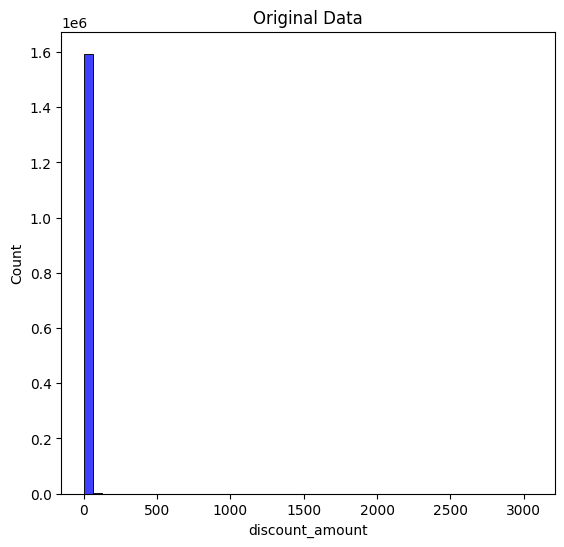

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original DataFrame and 'df_cleaned' is the DataFrame after outlier removal
# Make sure you've already calculated 'df_cleaned' using the IQR method you've mentioned

# Histograms
plt.figure(figsize=(14, 6))

# Histogram for the original data
plt.subplot(1, 2, 1)
sns.histplot(X_train['discount_amount'], kde=False, bins=50, color='blue')
plt.title('Original Data')

Text(0.5, 1.0, 'Original Data')

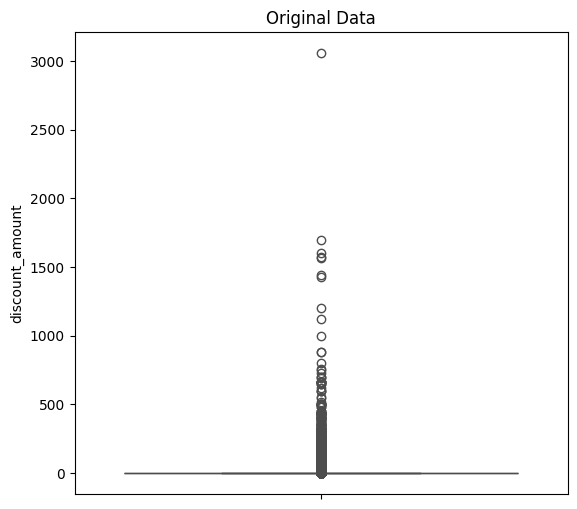

In [12]:
# Boxplots
plt.figure(figsize=(14, 6))

# Boxplot for the original data
plt.subplot(1, 2, 1)
sns.boxplot(y=X_train['discount_amount'], color='blue')
plt.title('Original Data')

<ipython-input-19-fe174b4d1326>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['discount_amount'])


<Axes: xlabel='discount_amount', ylabel='Density'>

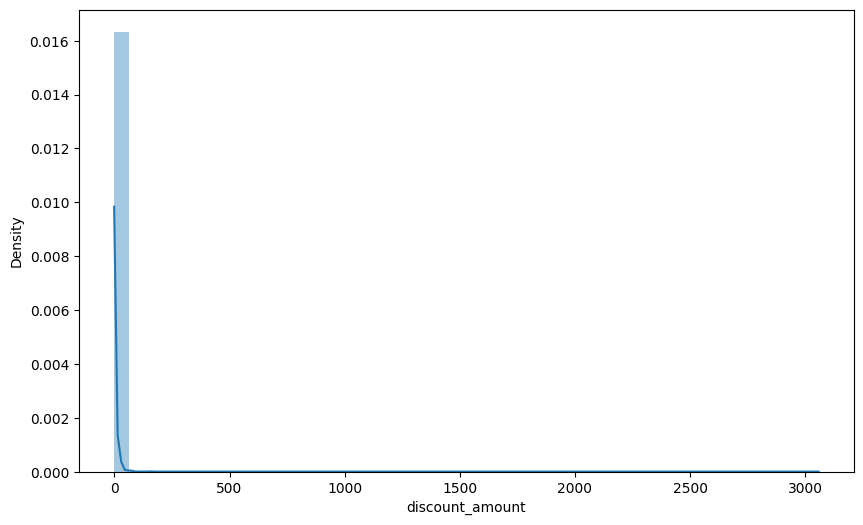

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(X_train['discount_amount'])

In [ ]:
sns.countplot(X_train['discount_amount'])

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_amount', y='price', data=X_train)

In [13]:
# DataFrame clean 'discount_amount'
Q1 = X_train['discount_amount'].quantile(0.25)
Q3 = X_train['discount_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = X_train[(X_train['discount_amount'] >= lower_bound) & (X_train['discount_amount'] <= upper_bound)]

In [14]:
(df_cleaned.columns, df_cleaned.shape), (X_test.columns, X_test.shape)

((Index(['price', 'vat', 'discount_amount', 'generic_discount',
         'self_consumption_discount', 'status_Merged', 'status_Paid',
         'status_Printed Cancelled', 'status_Printed Open', 'status_Unpaid',
         'status_Wasted', 'omonth', 'oyear', 'oday', 'product_created_at_year',
         'product_created_at_month', 'product_created_at_day', 'paid_date_year',
         'paid_date_month', 'paid_date_day', 'oddate_year', 'oddate_month',
         'oddate_day'],
        dtype='object'),
  (1510053, 23)),
 (Index(['price', 'vat', 'discount_amount', 'generic_discount',
         'self_consumption_discount', 'status_Merged', 'status_Paid',
         'status_Printed Cancelled', 'status_Printed Open', 'status_Unpaid',
         'status_Wasted', 'omonth', 'oyear', 'oday', 'product_created_at_year',
         'product_created_at_month', 'product_created_at_day', 'paid_date_year',
         'paid_date_month', 'paid_date_day', 'oddate_year', 'oddate_month',
         'oddate_day'],
        dtype

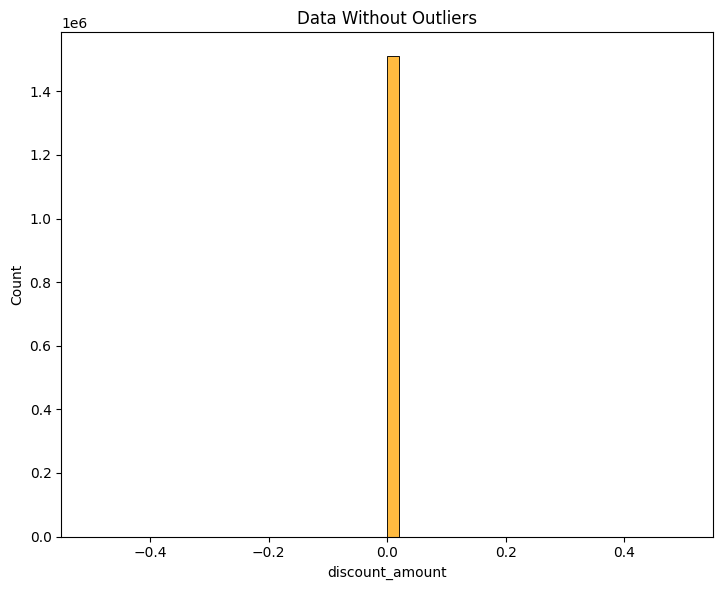

In [15]:
# Histograms
plt.figure(figsize=(14, 6))

# Histogram for the data without outliers
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['discount_amount'], kde=False, bins=50, color='orange')
plt.title('Data Without Outliers')

plt.tight_layout()
plt.show()

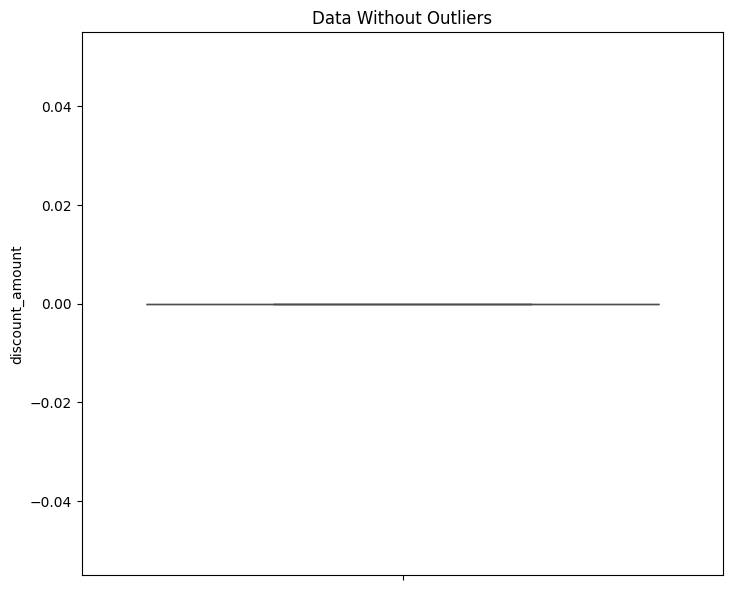

In [16]:
# Boxplots
plt.figure(figsize=(14, 6))

# Boxplot for the data without outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['discount_amount'], color='orange')
plt.title('Data Without Outliers')

plt.tight_layout()
plt.show()

<ipython-input-18-1886f0b3d8ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['discount_amount'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='discount_amount', ylabel='Density'>

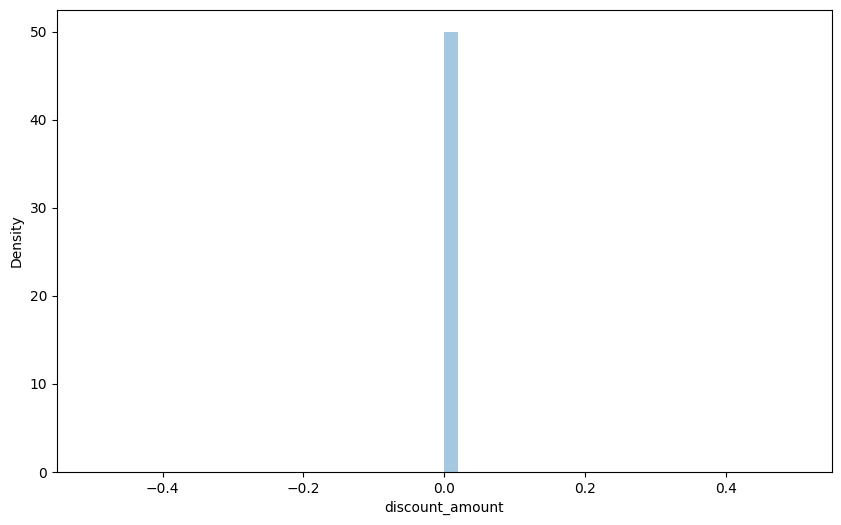

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df_cleaned['discount_amount'])

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_amount', y='price', data=df_cleaned)

In [ ]:
sns.countplot(df_cleaned['discount_amount'])

**Normalization**

In [73]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(df_cleaned)

# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled.shape, X_test_scaled.shape

((1595878, 23), (398970, 23))

**Train the Autoencoder**



1.  Calculate the statistical properties of the discount percentage.
2.  Determine a threshold for the reconstruction error above which a data point
    is considered an anomaly.
3.  Identify users who applied discounts exceeding this threshold.



**Import Necessary Libraries**

In [ ]:
!pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

**Define the Autoencoder Architecture**

In [93]:
input_dim = X_train_scaled.shape[1]  # 23 features

# Define the encoder with dropout
encoder = Sequential()
encoder.add(Dense(16,activation='relu',input_shape=(input_dim,)))
encoder.add(Dense(8,activation='relu'))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

# Define the decoder with dropout
decoder = Sequential()
decoder.add(Dense(6,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(16,activation='relu'))
decoder.add(Dense(input_dim, activation='sigmoid'))

# Define the autoencoder
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [95]:
# Train the autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=600,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

Epoch 1/600
4988/4988 [==============================] - 10s 2ms/step - loss: 0.0305 - val_loss: 0.0236
Epoch 2/600
4988/4988 [==============================] - 8s 2ms/step - loss: 0.0225 - val_loss: 0.0214
Epoch 3/600
4988/4988 [==============================] - 9s 2ms/step - loss: 0.0208 - val_loss: 0.0204
Epoch 4/600
4988/4988 [==============================] - 9s 2ms/step - loss: 0.0202 - val_loss: 0.0199
Epoch 5/600
4988/4988 [==============================] - 8s 2ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 6/600
4988/4988 [==============================] - 8s 2ms/step - loss: 0.0197 - val_loss: 0.0194
Epoch 7/600
4988/4988 [==============================] - 9s 2ms/step - loss: 0.0195 - val_loss: 0.0192
Epoch 8/600
4988/4988 [==============================] - 9s 2ms/step - loss: 0.0192 - val_loss: 0.0189
Epoch 9/600
4988/4988 [==============================] - 8s 2ms/step - loss: 0.0192 - val_loss: 0.0192
Epoch 10/600
4988/4988 [==============================] - 9s 2ms/step - 

**Evaluate the Model**

**Set a threshold for anomaly detection**
This means we're defining an anomaly as a data point whose reconstruction error is higher than 95% of all other data points' reconstruction errors. It's a statistical way of saying "these are the top 5% most unusual data points according to our model.

In [ ]:
# Predict the reconstruction of the test set
X_test_pred = autoencoder.predict(X_test_scaled)

# Calculate the mean squared error for each sample
reconstruction_error = np.mean(np.power(X_test_scaled - X_test_pred, 2), axis=1)

In [ ]:
# Calculate the 95th percentile of the reconstruction errors
threshold = np.quantile(reconstruction_error, 0.95)

# Identify data points where the reconstruction error exceeds the threshold
anomalies_indices = np.where(reconstruction_error > threshold)[0]

In [ ]:
anomalies = X_test_scaled[anomalies_indices]

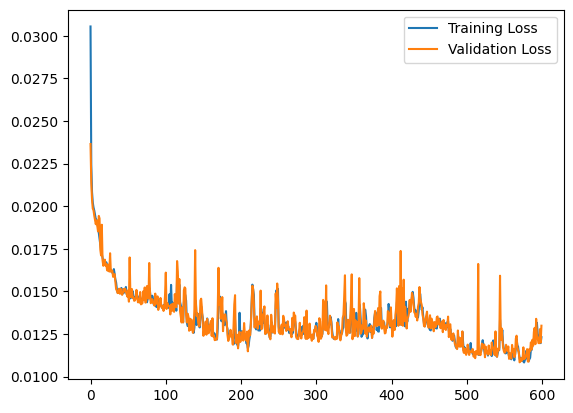

In [96]:
# inspect the training history to see how the model performed over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [97]:
losses = pd.DataFrame(autoencoder.history.history)

In [ ]:
losses

In [ ]:
input_dim = X_train_scaled.shape[1]  # 23 features

# Define the encoder with dropout
encoder = Sequential()
encoder.add(Dense(16,activation='relu',input_shape=(input_dim,)))
encoder.add(Dropout(0.1))
encoder.add(Dense(8,activation='relu'))
encoder.add(Dropout(0.1))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dropout(0.1))
encoder.add(Dense(2,activation='relu'))

# Define the decoder with dropout
decoder = Sequential()
decoder.add(Dense(6,activation='relu',input_shape=[2]))
decoder.add(Dropout(0.1))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dropout(0.1))
decoder.add(Dense(16,activation='relu'))
decoder.add(Dropout(0.1))
decoder.add(Dense(input_dim, activation='sigmoid'))

# Define the autoencoder
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the autoencoder with callbacks
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=600,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=[early_stopping, model_checkpoint])

In [ ]:
losses = pd.DataFrame(autoencoder.history.history)

In [ ]:
losses.head()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Visualization

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/final_data.csv')

In [4]:
df.columns, df.shape

(Index(['oid', 'odate', 'pos', 'paid_date', 'ocreated_at', 'oupdated_at',
        'ostatus_Merged', 'ostatus_Paid', 'ostatus_Printed Cancelled',
        'ostatus_Printed Open', 'ostatus_Unpaid', 'ostatus_Wasted',
        'order_uname', 'odid', 'ogid', 'oddate', 'net_price', 'price',
        'unit_price', 'units', 'vat', 'vat_percentage', 'discount_percentage',
        'discount_amount', 'payment_type', 'odcreated_at', 'odupdated_at',
        'pos_uname_missing', 'pos_uname', 'discount_uname', 'cancel_uname',
        'payment_uname', 'discount_uname_missing', 'cancel_uname_missing',
        'payment_uname_missing', 'generic_discount',
        'self_consumption_discount', 'odstatus_open', 'odstatus_paid',
        'odstatus_partially_printed', 'odstatus_printed_cancelled',
        'odstatus_printed_open', 'odstatus_Unpaid', 'product_name',
        'product_created_at', 'product_updated_at', 'product_name_missing',
        'product_created_at_missing', 'product_updated_at_missing'],
      

<Axes: xlabel='omonth', ylabel='discount_amount'>

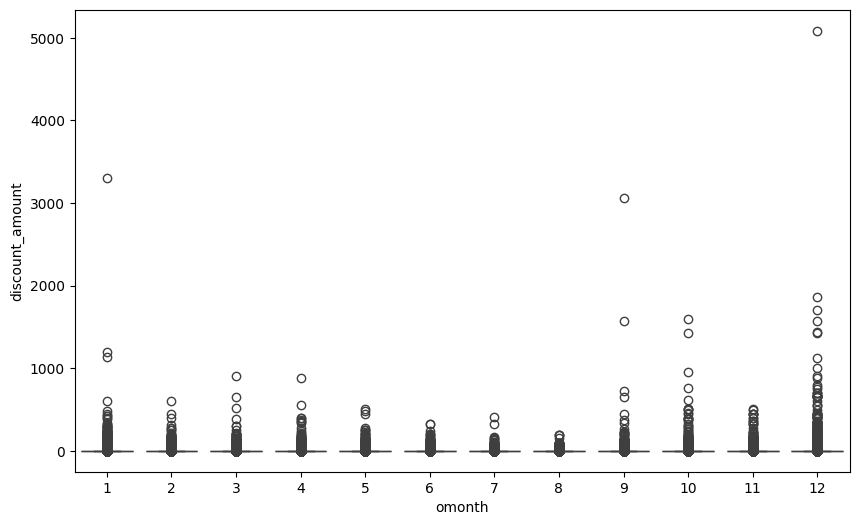

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='omonth', y='discount_amount', data=df)

<Axes: xlabel='product_created_at_day'>

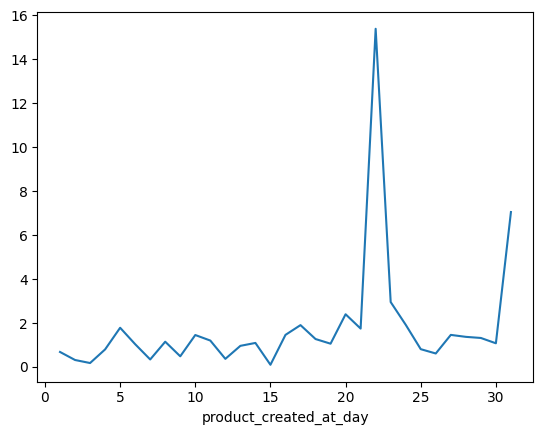

In [63]:
df.groupby('product_created_at_day').mean()['discount_amount'].plot()

<Axes: xlabel='oyear'>

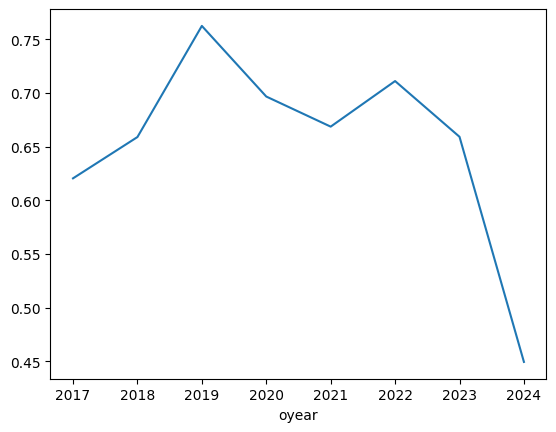

In [49]:
df.groupby('oyear').mean()['discount_amount'].plot()

<Axes: xlabel='oday'>

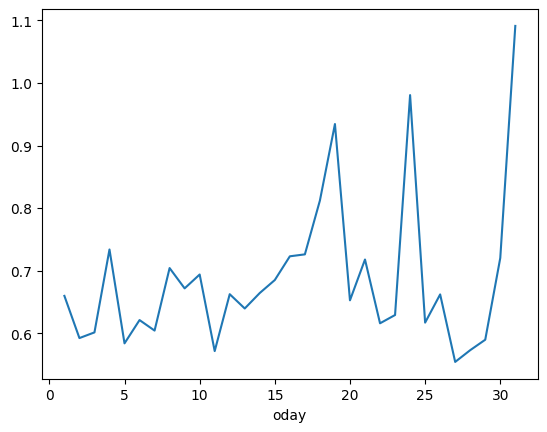

In [50]:
df.groupby('oday').mean()['discount_amount'].plot()

In [ ]:
df.head()

In [4]:
selected_columns = [
                    'net_price', 'price',
                    'unit_price', 'vat', 'discount_percentage',
                    'discount_amount'
                    ]

In [5]:
selected_df = df[selected_columns]

In [6]:
selected_df.dtypes

net_price              float64
price                  float64
unit_price             float64
vat                    float64
discount_percentage    float64
discount_amount        float64
dtype: object

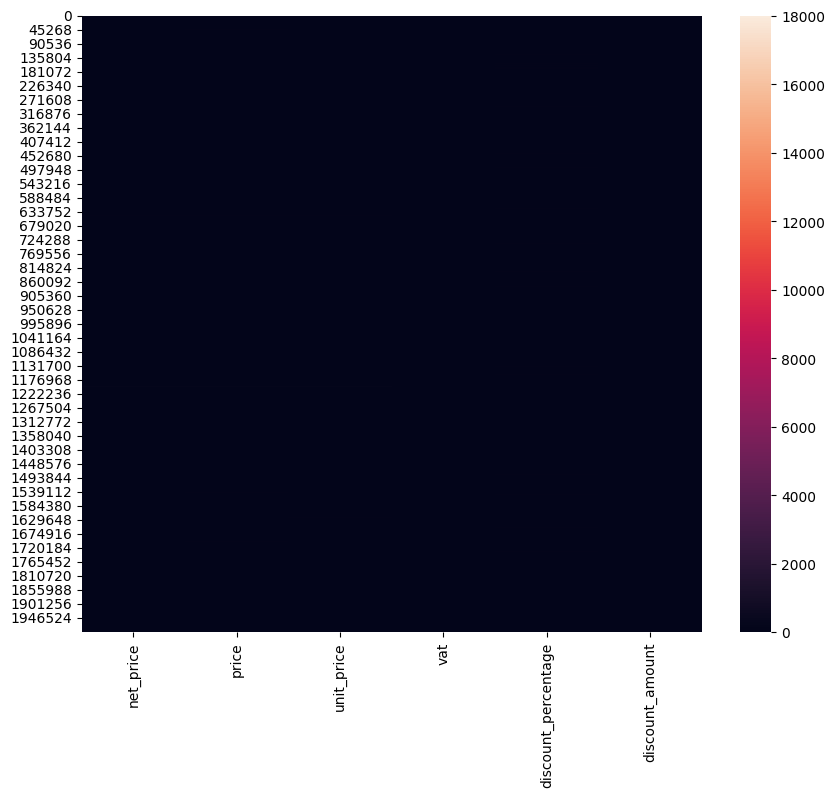

In [16]:
# plot the heatmap with the numeric-only DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df, annot=False)
plt.xticks(rotation=90)
plt.show()

<ipython-input-18-964d8f7745e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df['discount_amount'])


<Axes: xlabel='discount_amount', ylabel='Density'>

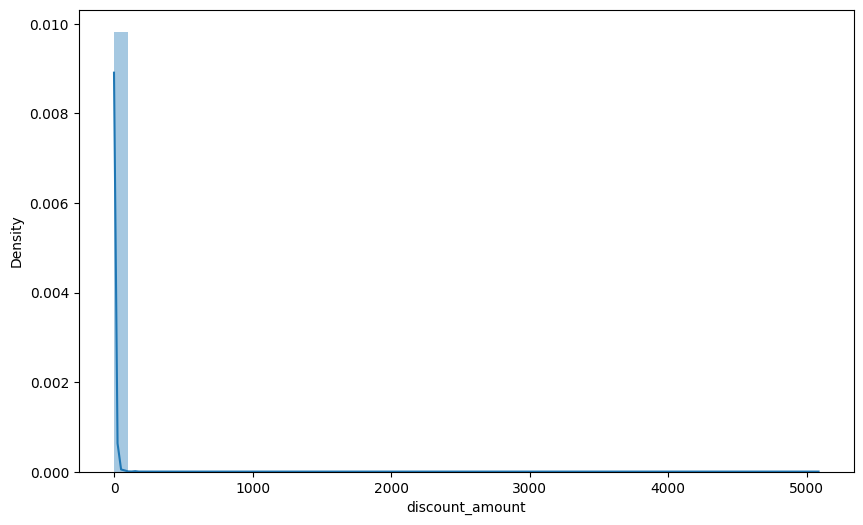

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(selected_df['discount_amount'])

<ipython-input-14-767b9fabde3d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df['discount_amount'],kde=False,bins=40)


<Axes: xlabel='discount_amount'>

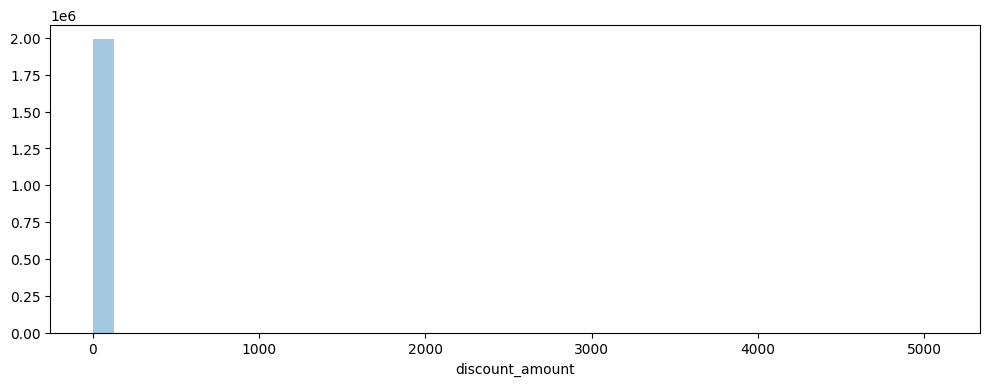

In [14]:
plt.figure(figsize=(12,4))
sns.distplot(selected_df['discount_amount'],kde=False,bins=40)

<ipython-input-19-ea53b83d1772>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df['discount_percentage'])


<Axes: xlabel='discount_percentage', ylabel='Density'>

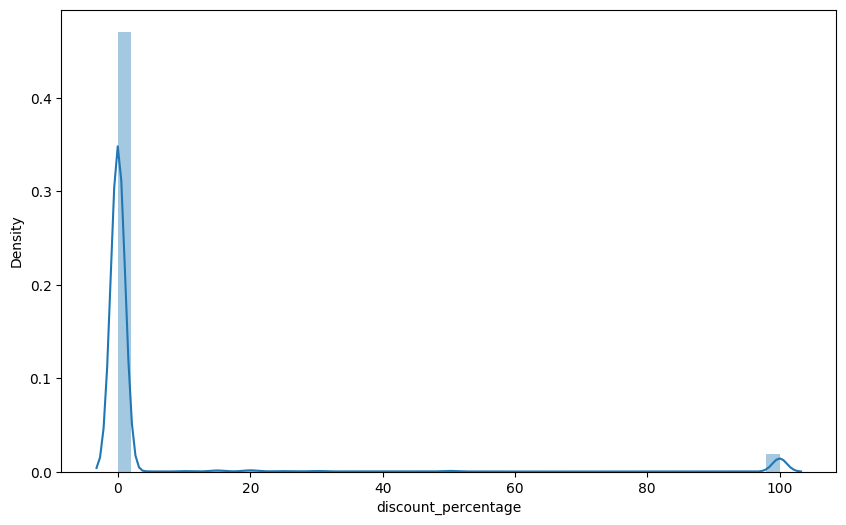

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(selected_df['discount_percentage'])

In [ ]:
sns.countplot(selected_df['discount_amount'])

In [ ]:
selected_df.corr()['discount_amount'].sort_values()

<Axes: xlabel='discount_amount', ylabel='price'>

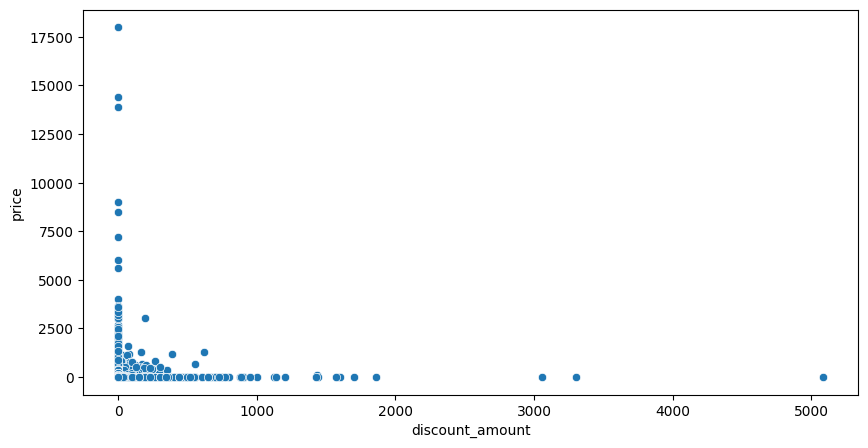

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_amount', y='price', data=selected_df)

<Axes: xlabel='discount_percentage', ylabel='price'>

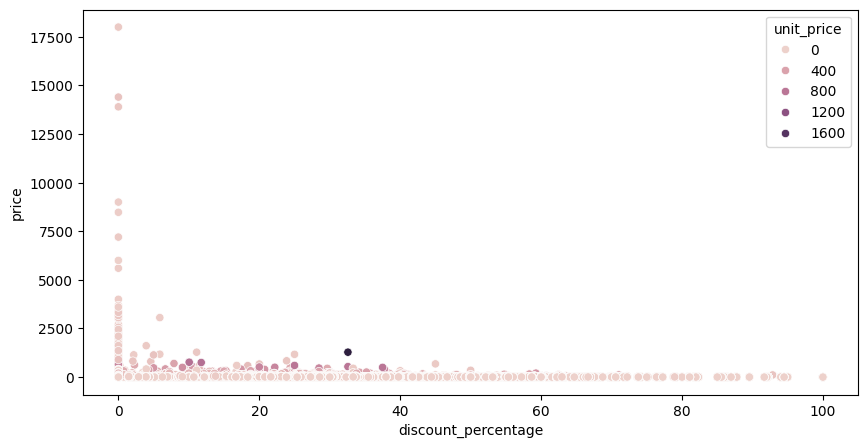

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_percentage', y='price', data=selected_df, hue='unit_price')

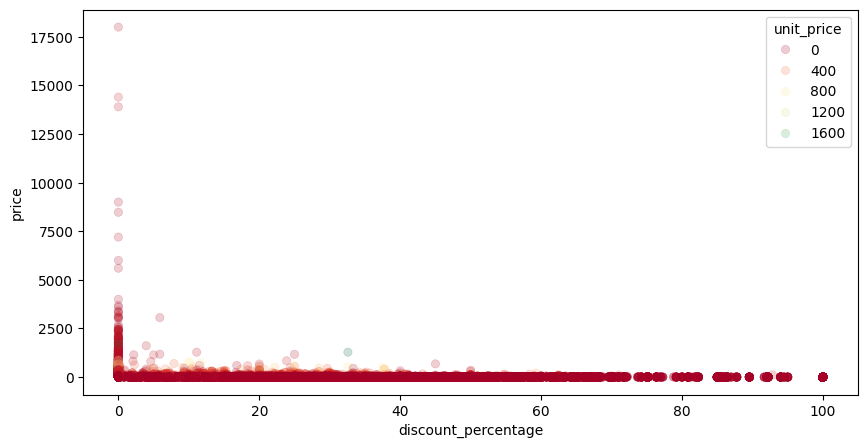

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_percentage', y='price', data=selected_df,
                edgecol or=None, alpha=0.2, palette='RdYlGn', hue='unit_price')
plt.show()

<Axes: xlabel='discount_percentage', ylabel='price'>

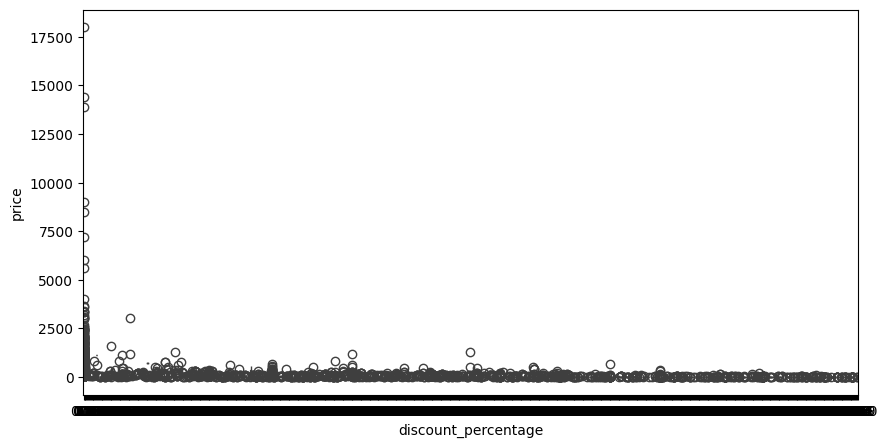

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x='discount_percentage', y='price', data=selected_df)

In [15]:
selected_df.sort_values('discount_amount',ascending=False).head(25)

,net_price,price,unit_price,vat,discount_percentage,discount_amount
52216,0.00,0.0,33.9,0.00,100.00,5085.00
347433,0.00,0.0,55.0,0.00,100.00,3300.00
1197822,0.00,0.0,78.4,0.00,100.00,3057.60
52217,0.00,0.0,12.4,0.00,100.00,1860.00
1209833,0.00,0.0,1700.0,0.00,100.00,1700.00
445430,0.00,0.0,1600.0,0.00,100.00,1600.00
340915,0.00,0.0,0.0,0.00,100.00,1576.35
1197826,0.00,0.0,78.4,0.00,100.00,1568.00
824843,0.00,0.0,60.0,0.00,100.00,1440.00
114926,88.71,110.0,110.0,21.29,92.86,1430.00


In [16]:
len(selected_df)*0.01

19917.71

In [18]:
not_top_1_perc = selected_df.sort_values('discount_amount', ascending=False).iloc[19918:]

<Axes: xlabel='discount_percentage', ylabel='price'>

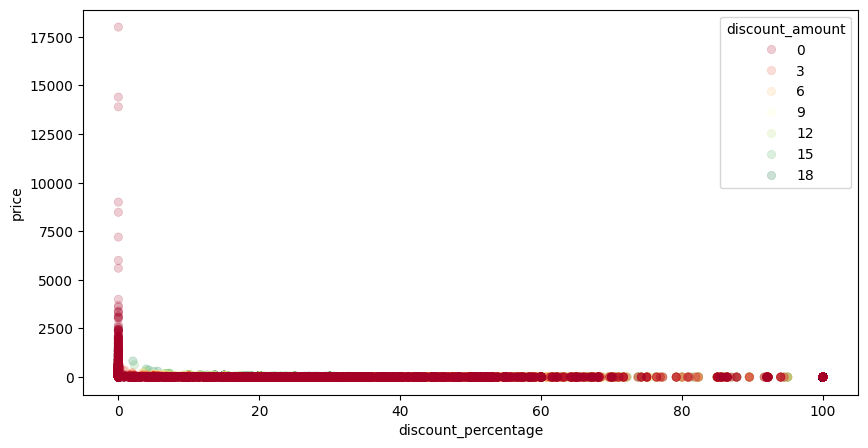

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_percentage', y='price', data=not_top_1_perc,
                edgecolor=None, alpha=0.2, palette='RdYlGn', hue='discount_amount')